In [20]:
import glob
import re
import pandas as pd

In [21]:
def load_hogar_ccaa_data(
    path_pattern: str = '../../datamarts/picotaData/hogarCCAA*.tsv',
    sort_by_ccaa: bool = True,
    ccaa_column_name: str = 'ccaa'
) -> pd.DataFrame:
    """
    Lee todos los ficheros TSV de hogares por CCAA, añade una columna con el código
    de CCAA extraído del nombre de fichero, concatena todo en un único DataFrame y
    opcionalmente ordena por CCAA.

    Parameters
    ----------
    path_pattern : str
        Patrón glob para localizar los archivos (por defecto '../../datamarts/picotaData/hogarCCAA*.tsv').
    sort_by_ccaa : bool
        Si True, ordena el DataFrame resultante por la columna de CCAA.
    ccaa_column_name : str
        Nombre de la columna donde se almacenará el código de CCAA.

    Returns
    -------
    pd.DataFrame
        DataFrame con todos los datos concatenados y la columna de CCAA.
    """
    files = glob.glob(path_pattern)
    dfs = []

    for fp in files:
        m = re.search(r'hogarCCAA(\d+)\.tsv$', fp)
        if not m:
            continue
        code = m.group(1).zfill(2)  # si quieres siempre dos dígitos, ojo

        df = pd.read_csv(fp, sep='\t')
        df[ccaa_column_name] = code
        dfs.append(df)

    if not dfs:
        raise FileNotFoundError(f"No se encontraron archivos con patrón {path_pattern}")

    big_df = pd.concat(dfs, ignore_index=True)

    if sort_by_ccaa:
        big_df.sort_values(ccaa_column_name, inplace=True)

    return big_df



In [22]:
df = load_hogar_ccaa_data()
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head()

timestamp  capitalProvincia  tamanoMunicipio  densidad  \
0      2006-01-01T00:00:00                 0                1         1   
26322  2017-01-01T00:00:00                 0                4         2   
26323  2017-01-01T00:00:00                 0                4         1   
26324  2017-01-01T00:00:00                 0                3         1   
26325  2017-01-01T00:00:00                 1                5         3   

       superficie  tipoCasa  aguaCaliente  calefaccion  zonaResidencial  \
0            80.0         1             1            0                3   
26322        63.0         2             1            0                6   
26323       300.0         3             1            0                6   
26324        65.0         1             1            0                4   
26325        94.0         2             1            0                5   

       regimenTenencia  comidasTotales  miembros:estudiantes  \
0                    4            84.0                     0   
26322                6            56.0                     0   
26323                5            78.0                     0   
26324                6            60.0                     0   
26325                4            24.0                     0   

       miembros:noEstudiantes  miembros:ocupados  miembros:noOcupados  \
0                           3                0.0                    3   
26322                       2                0.0                    2   
26323                       3                2.0                    1   
26324                       2                0.0                    2   
26325                       1                1.0                    0   

       miembros:activos  miembros:noActivos  miembros:ancianos:masculinos  \
0                   1.0                   2                             1   
26322               0.0                   2                             1   
26323               2.0                   1                             0   
26324               0.0                   2                             1   
26325               1.0                   0                             0   

       miembros:ancianos:femeninos  miembros:adultos:masculinos  \
0                                1                            0   
26322                            1                            0   
26323                            0                            1   
26324                            1                            0   
26325                            0                            1   

       miembros:adultos:femeninos  miembros:niños:femeninos  \
0                               0                         1   
26322                           0                         0   
26323                           1                         0   
26324                           0                         0   
26325                           0                         0   

       miembros:niños:masculinos  miembros:conIngresos:masculinos  \
0                              0                                1   
26322                          0                                1   
26323                          1                                1   
26324                          0                                1   
26325                          0                                1   

       miembros:conIngresos:femeninos  miembros:sinIngresos:masculinos  \
0                                   1                                0   
26322                               1                                0   
26323                               1                                1   
26324                               1                                0   
26325                               0                                0   

       miembros:sinIngresos:femeninos  edadSp  espanolSp  educacionSuperiorSp  \
0                                   1      67          1                    0   
26322                   

Convertimos en dummies las variables categoricas

In [23]:
df = pd.get_dummies(df, columns=['ccaa', 'fuentePrincipalIngresos'], prefix=['ccaa', 'fuentePrincipalIngresos'])

df.rename(columns=lambda x: re.sub(r'^ccaa_(\d+)$', r'ccaa_\1', x), inplace=True)
df.rename(columns=lambda x: re.sub(r'^fuentePrincipalIngresos_(\d+)$', r'fuentePrincipalIngresos_\1', x), inplace=True)


In [24]:
df['miembros:total'] = df['miembros:activos'] + df['miembros:noActivos']
df['miembros:niños'] = df['miembros:niños:masculinos'] + df['miembros:niños:femeninos']
df["miembros:adultos"] = df['miembros:adultos:masculinos'] + df['miembros:adultos:femeninos']
df["miembros:ancianos"] = df['miembros:ancianos:masculinos'] + df['miembros:ancianos:femeninos']

In [25]:
df.head(
)

timestamp  capitalProvincia  tamanoMunicipio  densidad  \
0      2006-01-01T00:00:00                 0                1         1   
26322  2017-01-01T00:00:00                 0                4         2   
26323  2017-01-01T00:00:00                 0                4         1   
26324  2017-01-01T00:00:00                 0                3         1   
26325  2017-01-01T00:00:00                 1                5         3   

       superficie  tipoCasa  aguaCaliente  calefaccion  zonaResidencial  \
0            80.0         1             1            0                3   
26322        63.0         2             1            0                6   
26323       300.0         3             1            0                6   
26324        65.0         1             1            0                4   
26325        94.0         2             1            0                5   

       regimenTenencia  comidasTotales  miembros:estudiantes  \
0                    4            84.0                     0   
26322                6            56.0                     0   
26323                5            78.0                     0   
26324                6            60.0                     0   
26325                4            24.0                     0   

       miembros:noEstudiantes  miembros:ocupados  miembros:noOcupados  \
0                           3                0.0                    3   
26322                       2                0.0                    2   
26323                       3                2.0                    1   
26324                       2                0.0                    2   
26325                       1                1.0                    0   

       miembros:activos  miembros:noActivos  miembros:ancianos:masculinos  \
0                   1.0                   2                             1   
26322               0.0                   2                             1   
26323               2.0                   1                             0   
26324               0.0                   2                             1   
26325               1.0                   0                             0   

       miembros:ancianos:femeninos  miembros:adultos:masculinos  \
0                                1                            0   
26322                            1                            0   
26323                            0                            1   
26324                            1                            0   
26325                            0                            1   

       miembros:adultos:femeninos  miembros:niños:femeninos  \
0                               0                         1   
26322                           0                         0   
26323                           1                         0   
26324                           0                         0   
26325                           0                         0   

       miembros:niños:masculinos  miembros:conIngresos:masculinos  \
0                              0                                1   
26322                          0                                1   
26323                          1                                1   
26324                          0                                1   
26325                          0                                1   

       miembros:conIngresos:femeninos  miembros:sinIngresos:masculinos  \
0                                   1                                0   
26322                               1                                0   
26323                               1                                1   
26324                               1                                0   
26325                               0                                0   

       miembros:sinIngresos:femeninos  edadSp  espanolSp  educacionSuperiorSp  \
0                                   1      67          1                    0   
26322                   

In [26]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]


## Analísis de sensibilidad no lineal por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Categoría                                                                                           |
|--------|-----------------------------------------------------------------------------------------------------|
| 01.1   | PRODUCTOS ALIMENTICIOS                                                                              |
| 01.2   | BEBIDAS NO ALCOHÓLICAS                                                                              |
| 02.1   | BEBIDAS ALCOHÓLICAS                                                                                 |
| 02.2   | TABACO                                                                                              |
| 03.1   | ARTÍCULOS DE VESTIR                                                                                 |
| 03.2   | CALZADO                                                                                             |
| 04.1   | ALQUILERES REALES DE LA VIVIENDA                                                                    |
| 04.2   | ALQUILERES IMPUTADOS DE LA VIVIENDA                                                                 |
| 04.3   | GASTOS CORRIENTES DE MANTENIMIENTO Y REPARACIÓN DE LA VIVIENDA                                     |
| 04.4   | SUMINISTRO DE AGUA Y OTROS SERVICIOS RELACIONADOS CON LA VIVIENDA                                  |
| 04.5   | ELECTRICIDAD, GAS Y OTROS COMBUSTIBLES                                                              |
| 05.1   | MUEBLES, ARTÍCULOS DE AMUEBLAMIENTO, ALFOMBRAS Y OTROS REVESTIMIENTOS PARA SUELOS                  |
| 05.2   | ARTÍCULOS TEXTILES PARA EL HOGAR                                                                    |
| 05.3   | APARATOS DE CALEFACCIÓN Y DE COCINA, FRIGORÍFICOS, LAVADORAS Y OTROS GRANDES ELECTRODOMÉSTICOS     |
| 05.4   | CRISTALERÍA, VAJILLA, CUBERTERÍA Y OTROS UTENSILIOS DEL HOGAR                                       |
| 05.5   | HERRAMIENTAS PARA CASA Y JARDÍN                                                                     |
| 05.6   | BIENES Y SERVICIOS PARA EL MANTENIMIENTO CORRIENTE DEL HOGAR                                       |
| 06.1   | PRODUCTOS FARMACÉUTICOS; APARATOS Y MATERIAL TERAPÉUTICO                                            |
| 06.2   | SERVICIOS MÉDICOS Y PARAMÉDICOS AMBULATORIOS                                                        |
| 06.3   | SERVICIOS HOSPITALARIOS                                                                             |
| 07.1   | COMPRA DE VEHÍCULOS                                                                                 |
| 07.2   | UTILIZACIÓN DE VEHÍCULOS PERSONALES                                                                 |
| 07.3   | SERVICIOS DE TRANSPORTE                                                                             |
| 08.1   | SERVICIOS POSTALES                                                                                  |
| 08.2   | EQUIPOS DE TELÉFONO Y FAX                                                                           |
| 08.3   | SERVICIOS DE TELÉFONO Y FAX                                                                         |
| 09.1   | EQUIPOS Y ACCESORIOS AUDIOVISUALES, FOTOGRÁFICOS Y DE PROCESAMIENTO DE INFORMACIÓN                 |
| 09.2   | OTROS BIENES DURADEROS PARA EL OCIO Y LA CULTURA                                                   |
| 09.3   | OTROS ARTÍCULOS Y EQUIPOS PARA EL OCIO, JARDINERÍA Y MASCOTAS                                      |
| 09.4   | SERVICIOS RECREATIVOS Y CULTURALES                                                                  |
| 09.5   | PRENSA, LIBRERÍA Y PAPELERÍA                                                                        |
| 09.6   | PAQUETES TURÍSTICOS                                                                                 |
| 10.1   | EDUCACIÓN INFANTIL Y PRIMARIA (NIVELES 0 Y 1 CNED-P-2014)                                           |
| 10.2   | EDUCACIÓN SECUNDARIA Y EDUCACIÓN POSTSECUNDARIA NO SUPERIOR (NIVELES 2, 3 Y 4 CNED-P-2014)         |
| 10.3   | EDUCACIÓN SUPERIOR (NIVELES 5, 6, 7 y 8 CNED-P-2014)                                                |
| 10.4   | EDUCACIÓN NO FORMAL (NIVEL 9 CNED-P-2014)                                                           |
| 11.1   | RESTAURACIÓN                                                                                        |
| 11.2   | SERVICIOS DE ALOJAMIENTO                                                                            |
| 12.1   | CUIDADOS PERSONALES                                                                                 |
| 12.3   | EFECTOS PERSONALES NO DECLARADOS ANTERIORMENTE                                                     |
| 12.4   | PROTECCIÓN SOCIAL                                                                                   |
| 12.5   | SERVICIOS DE SEGUROS                                                                                |
| 12.6   | SERVICIOS FINANCIEROS NO DECLARADOS EN OTRA PARTE                                                  |
| 12.7   | OTROS SERVICIOS NO DECLARADOS ANTERIORMENTE                                                        |
| 12.8   | REMESAS                                                                                             |


---


## GradientBoosting Regressor

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

def train_gb_per_category(
    df,
    output_columns,
    # Hiperparámetros iniciales basados en buenas prácticas:
    n_estimators=500,          # suficientes árboles para un learning_rate bajo
    learning_rate=0.05,        # entre 0.05 y 0.2 suelen funcionar bien 
    max_depth=3,               # controla complejidad del árbol 
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,             # regularización vía muestreo 
    max_features='sqrt',       # regla thumb para GB
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42,
    top_n=10
):
    """
    Entrena un GradientBoostingRegressor para cada columna objetivo y calcula:
      - R2 y MSE
      - Importancias por permutación
    Devuelve:
      - r2_df: DataFrame ordenado por R2 descendente
      - mse_df: DataFrame ordenado por MSE ascendente
      - importances_df: concatenado de importancias
    """
    r2_records = []
    mse_records = []
    all_importances = []

    excluded = output_columns + ["timestamp"] if "timestamp" in df.columns else output_columns
    input_features = [c for c in df.select_dtypes(include="number").columns if c not in excluded]

    for target in output_columns:
        print(f"\n🔧 Training GB for {target}...")

        df_clean = df.dropna(subset=[target] + input_features)
        if df_clean.shape[0] < len(input_features) + 10:
            print("❌ Not enough data. Skipping.")
            continue

        X = df_clean[input_features]
        y = df_clean[target]

        # Split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state
        )

        # Normalizar si lo necesitas (no es crítico para árboles, pero ayuda si las variables difieren mucho)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test  = scaler.transform(X_test)

        gb = GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            subsample=subsample,
            max_features=max_features,
            validation_fraction=validation_fraction,
            n_iter_no_change=n_iter_no_change,
            random_state=random_state
        )
        gb.fit(X_train, y_train)

        # Predicción y métricas
        y_pred = gb.predict(X_test)
        r2  = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"✅ R²: {r2:.4f}, MSE: {mse:.4f}")

        # Importancia por permutación
        print("🔍 Calculating permutation importances...")
        result = permutation_importance(gb, X_test, y_test,
                                        n_repeats=5,
                                        random_state=random_state,
                                        n_jobs=1)
        imp_df = pd.DataFrame({
            "Variable": input_features,
            "Importance": result.importances_mean,
            "Target": target
        }).sort_values("Importance", ascending=False)

        print(f"📊 Top {top_n} variables for {target}:")
        print(imp_df.head(top_n).to_string(index=False))

        r2_records.append({"Target": target, "R2": r2})
        mse_records.append({"Target": target, "MSE": mse})
        all_importances.append(imp_df)

    r2_df         = pd.DataFrame(r2_records).sort_values("R2", ascending=False)
    mse_df        = pd.DataFrame(mse_records).sort_values("MSE", ascending=True)
    importances_df = pd.concat(all_importances, ignore_index=True)

    return r2_df, importances_df, mse_df


In [30]:
r2_df, importances_df, mse_df = train_gb_per_category(df, output_columns)



🔧 Training GB for gastoMonetario:productosAlimenticios11...
✅ R²: 0.4387, MSE: 3373089.0232
🔍 Calculating permutation importances...
📊 Top 10 variables for gastoMonetario:productosAlimenticios11:
              Variable  Importance                                 Target
            tasaAhorro    0.258491 gastoMonetario:productosAlimenticios11
         ingresosNetos    0.227927 gastoMonetario:productosAlimenticios11
        comidasTotales    0.139346 gastoMonetario:productosAlimenticios11
                   ipc    0.038388 gastoMonetario:productosAlimenticios11
                edadSp    0.026615 gastoMonetario:productosAlimenticios11
      tasaCambioEurUsd    0.018337 gastoMonetario:productosAlimenticios11
miembros:noEstudiantes    0.008333 gastoMonetario:productosAlimenticios11
           tipoInteres    0.005252 gastoMonetario:productosAlimenticios11
      gastoNoMonetario    0.004570 gastoMonetario:productosAlimenticios11
             inflacion    0.003588 gastoMonetario:productosAlim

In [31]:
importances_df.head(5)

Variable  Importance                                  Target
0      tasaAhorro    0.258491  gastoMonetario:productosAlimenticios11
1   ingresosNetos    0.227927  gastoMonetario:productosAlimenticios11
2  comidasTotales    0.139346  gastoMonetario:productosAlimenticios11
3             ipc    0.038388  gastoMonetario:productosAlimenticios11
4          edadSp    0.026615  gastoMonetario:productosAlimenticios11

### Analísis del r2 de nuestros modelos

In [32]:
r2_df

Target        R2
6       gastoMonetario:alquileresRealesDeLaVivienda41  0.743899
0              gastoMonetario:productosAlimenticios11  0.438651
19                 gastoMonetario:compraDeVehiculos71  0.438017
35                     gastoMonetario:restauracion111  0.383993
8                   gastoMonetario:suministroDeAgua44  0.365967
31       gastoMonetario:educacionInfantilYPrimaria101  0.363694
9   gastoMonetario:electricidadGasOtrosCombustibles45  0.362249
41             gastoMonetario:serviciosFinancieros126  0.345409
32  gastoMonetario:educacionSecundariaYPostsecunda...  0.324712
24              gastoMonetario:serviciosTelefonoFax83  0.294516
15        gastoMonetario:bienesServiciosParaElHogar56  0.249706
20          gastoMonetario:usoDeVehiculosPersonales72  0.245697
23                gastoMonetario:equiposTelefonoFax82  0.234548
40                          gastoMonetario:seguros125  0.232758
33                gastoMonetario:educacionSuperior103  0.214037
30                gastoMonetario:paquetesTuristicos96  0.209389
37               gastoMonetario:cuidadosPersonales121  0.205769
36                      gastoMonetario:alojamiento112  0.205135
4                  gastoMonetario:articulosDeVestir31  0.198518
1               gastoMonetario:bebidasNoAlcoholicas12  0.161273
5                            gastoMonetario:calzado32  0.157475
21             gastoMonetario:serviciosDeTransporte73  0.141981
3                             gastoMonetario:tabaco22  0.118826
18            gastoMonetario:serviciosHospitalarios63  0.118585
16            gastoMonetario:productosFarmaceuticos61  0.115267
29                  gastoMonetario:prensaYPapeleria95  0.113266
34                gastoMonetario:educacionNoFormal104  0.106595
27           gastoMonetario:ocioJardineriaYMascotas93  0.099852
42                   gastoMonetario:otrosServicios127  0.099559
28   gastoMonetario:serviciosRecreativosYCulturales94  0.088447
2                 gastoMonetario:bebidasAlcoholicas21  0.083724
7          gastoMonetario:mantenimientoDeLaVivienda43  0.082885
43                          gastoMonetario:remesas128  0.082321
10             gastoMonetario:mueblesRevestimientos51  0.080530
17      gastoMonetario:serviciosMedicosAmbulatorios62  0.071574
39                 gastoMonetario:proteccionSocial124  0.067771
25           gastoMonetario:audiovisualesTecnologia91  0.065756
12          gastoMonetario:grandesElectrodomesticos53  0.061671
11               gastoMonetario:textilesParaElHogar52  0.059547
22                 gastoMonetario:serviciosPostales81  0.057404
38                gastoMonetario:efectosPersonales123  0.046540
14            gastoMonetario:herramientasCasaJardin55  0.046521
13                gastoMonetario:utensiliosDelHogar54  0.028767
26             gastoMonetario:bienesDuraderosDeOcio92  0.013829

### Importancia de las variables por categoría de gasto

In [34]:
import matplotlib.pyplot as plt

def plot_feature_importances_by_target(df, top_n=15):
    """
    Genera una gráfica de barras horizontales por cada target en el DataFrame,
    mostrando las top_n variables más importantes.

    Parámetros:
    - df: DataFrame con columnas ['feature', 'importance', 'target']
    - top_n: número de variables más importantes a mostrar (por defecto 15)
    """
    targets = df['Target'].unique()
    for target in targets:
        subset = df[df['Target'] == target].sort_values(by='Importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(subset['Variable'], subset['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de variables para: {target}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


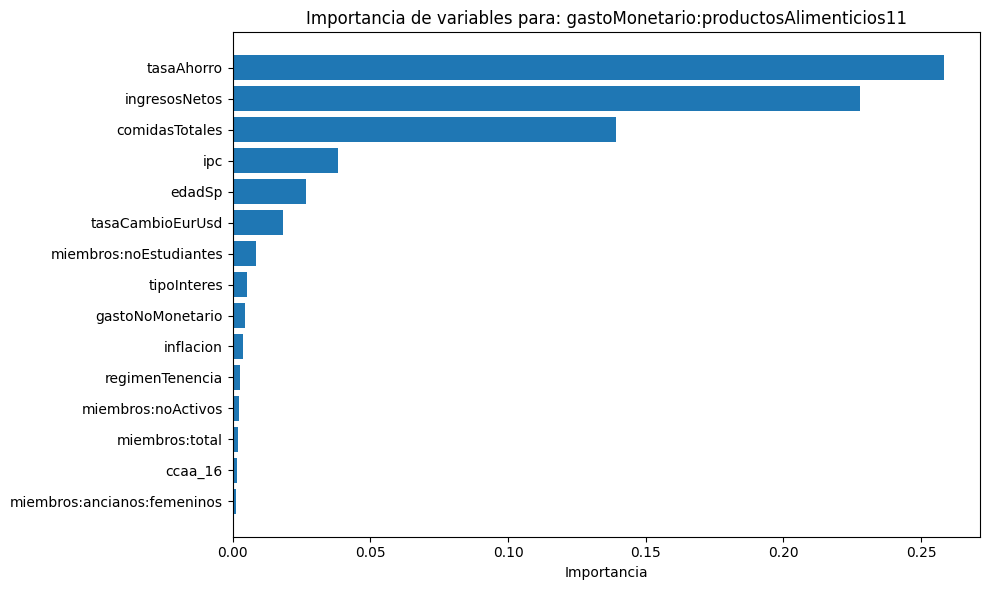

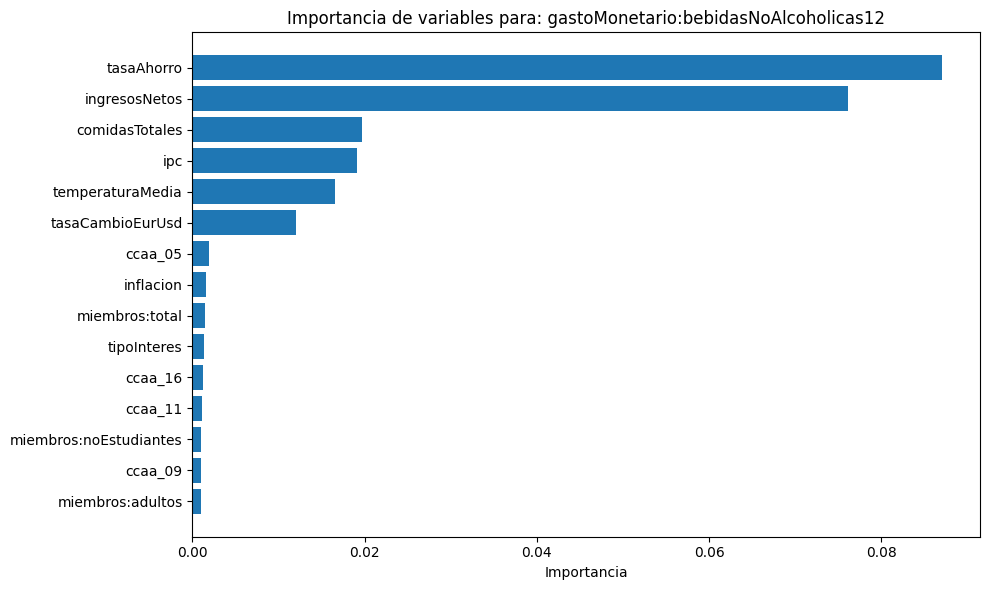

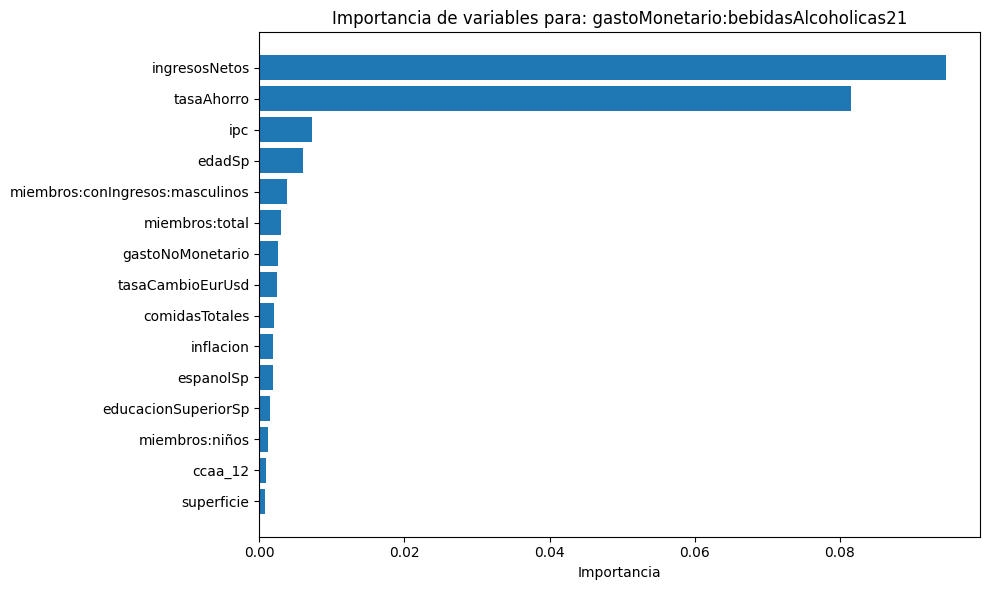

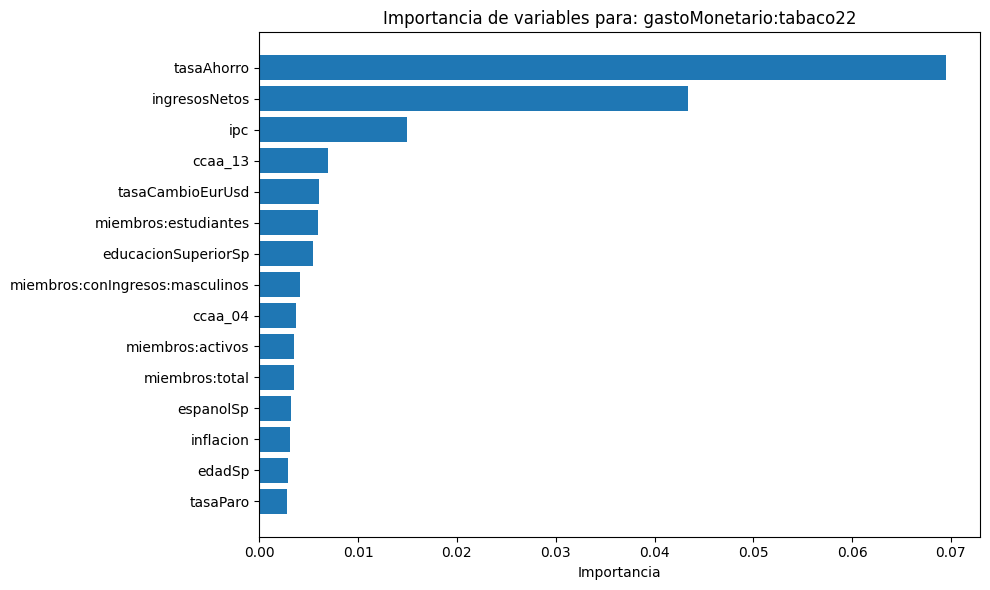

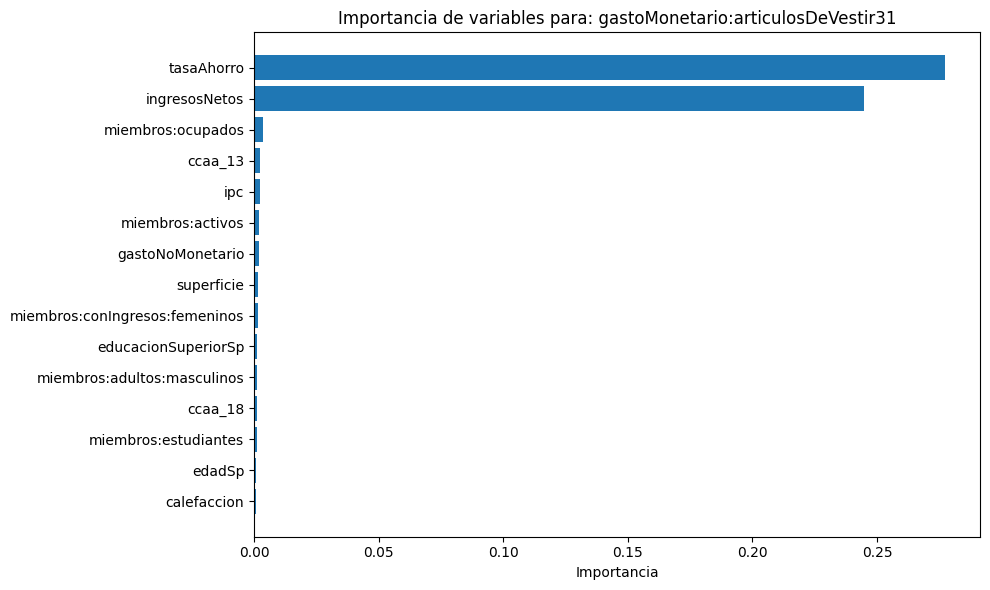

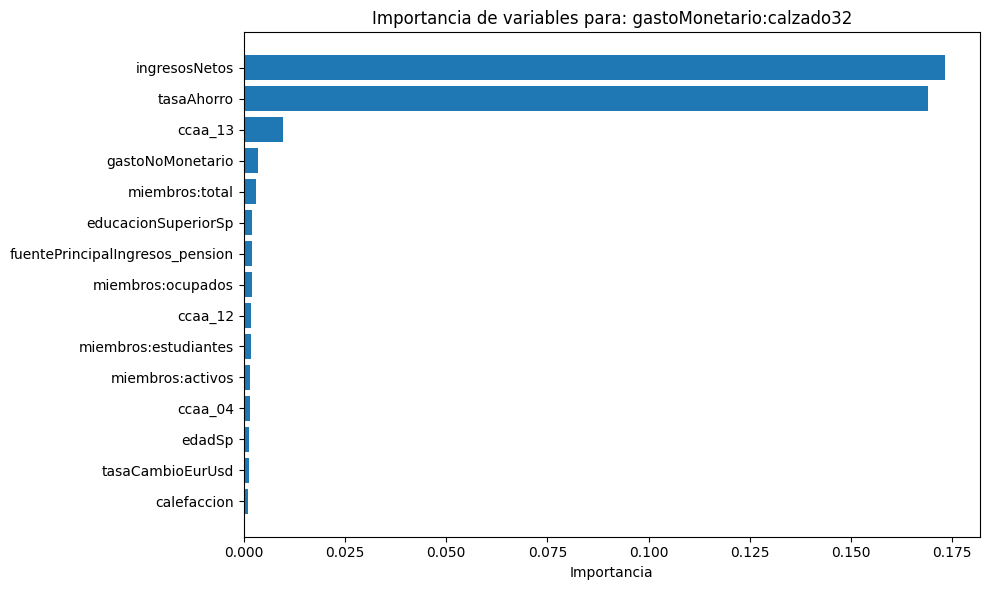

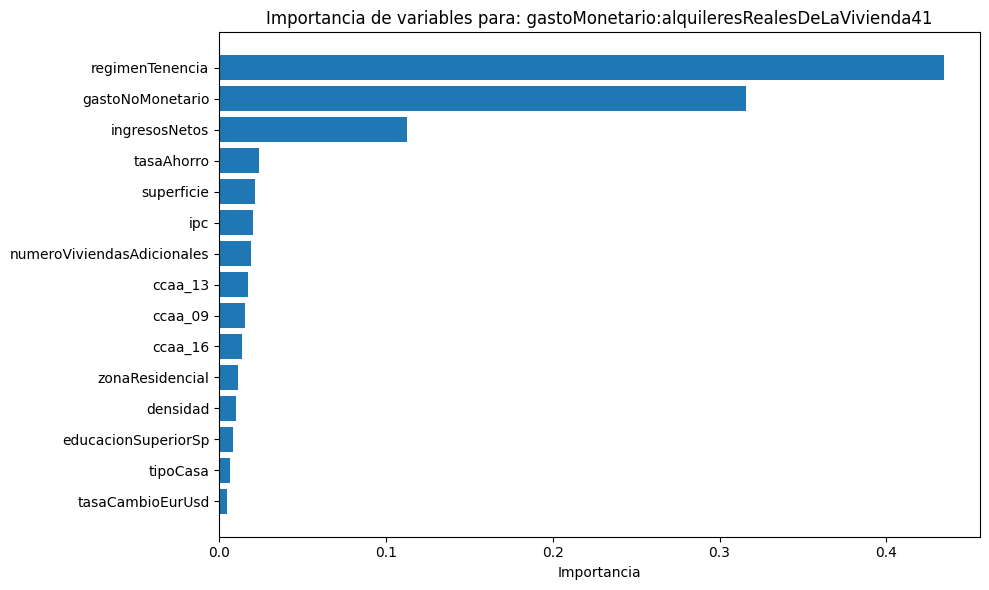

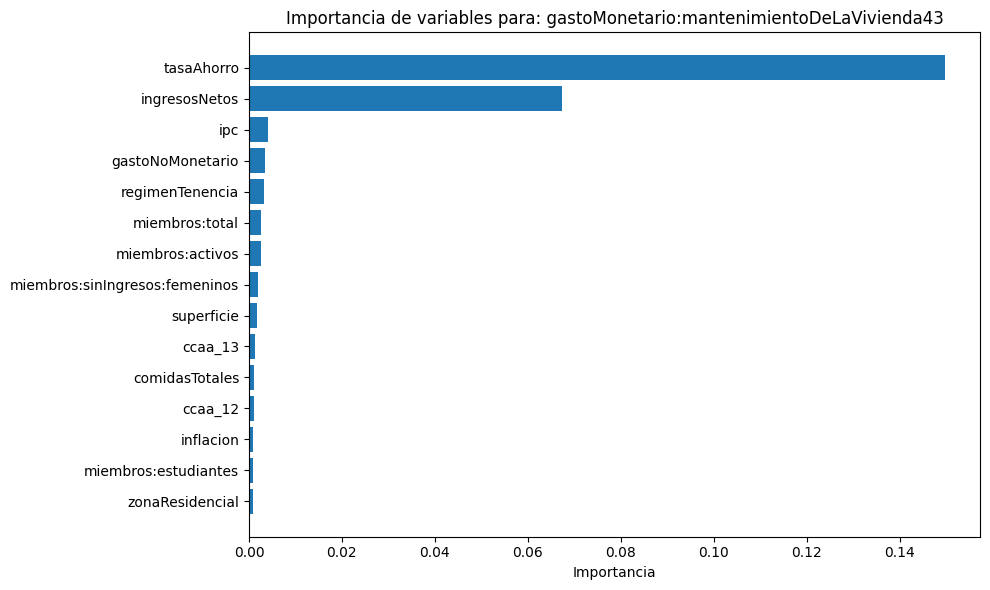

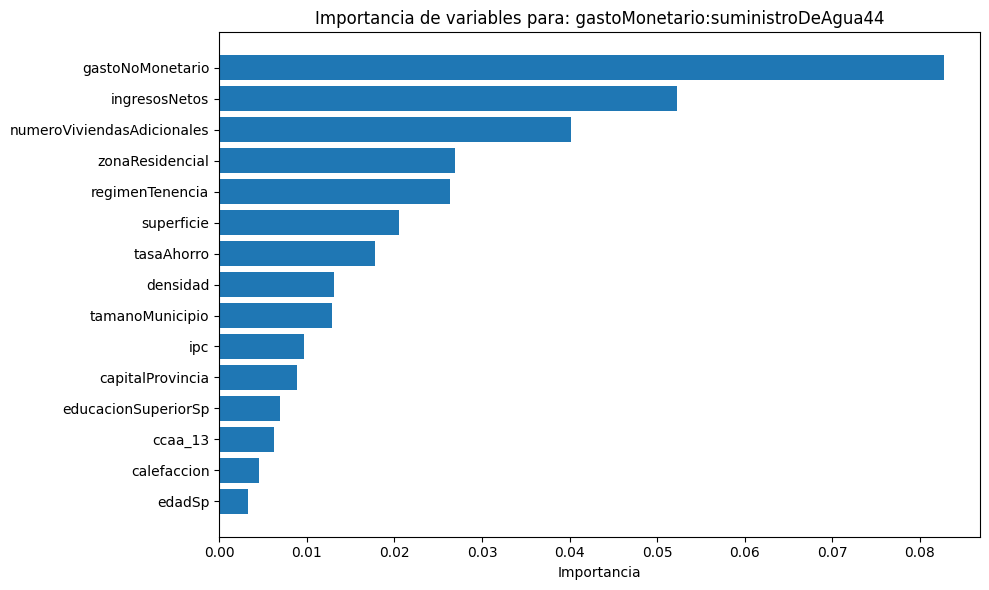

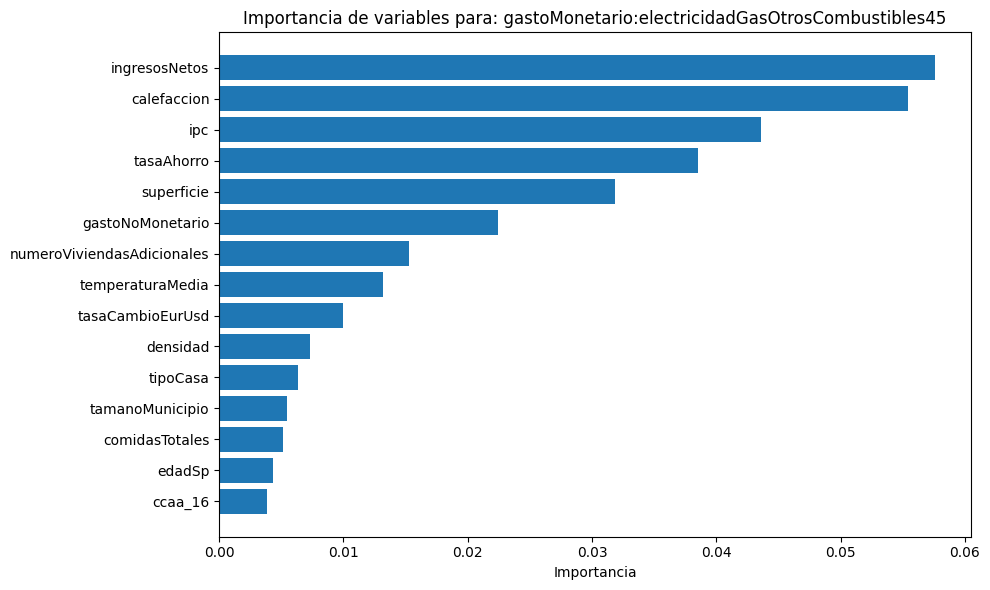

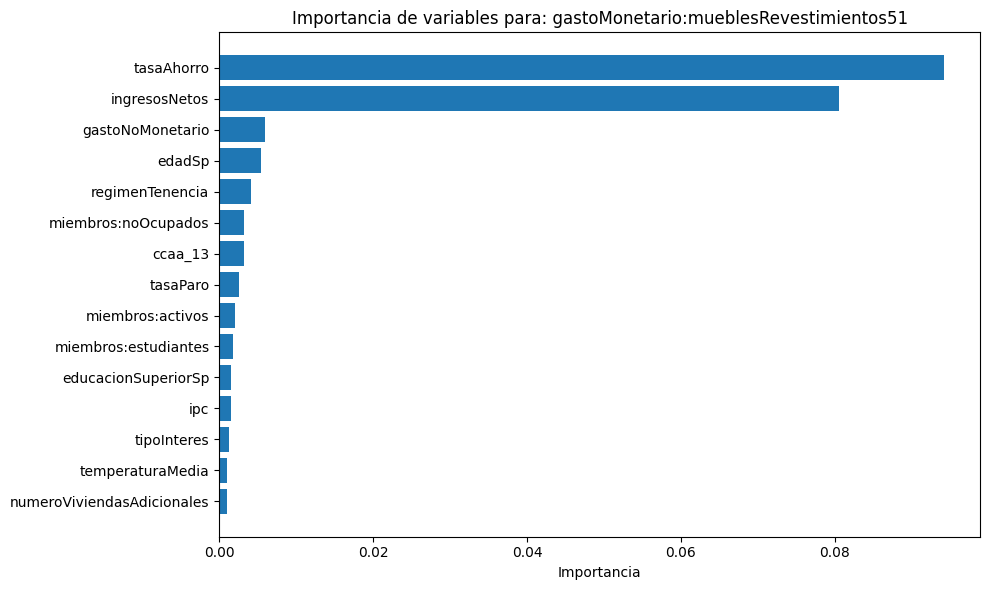

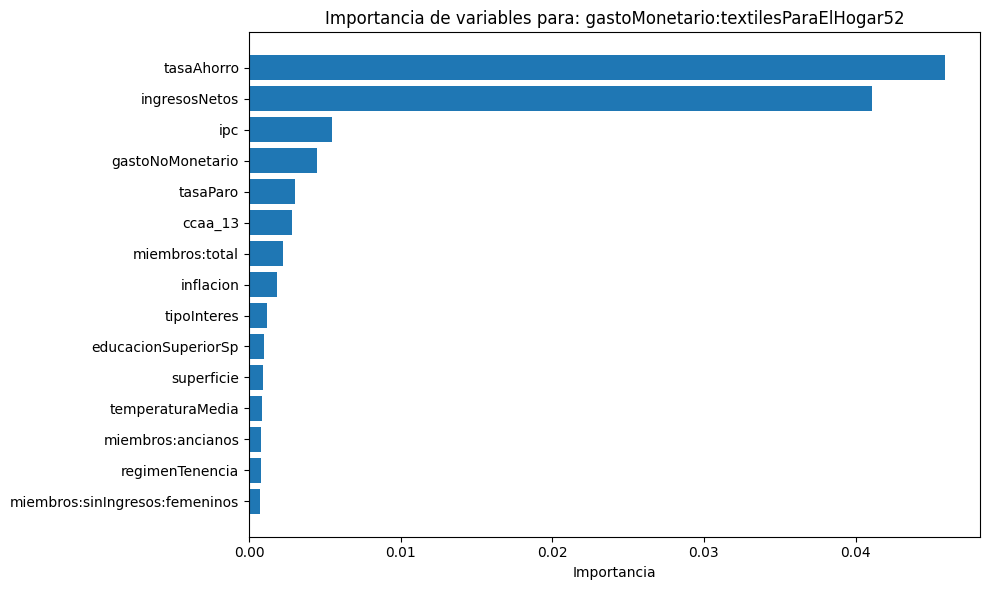

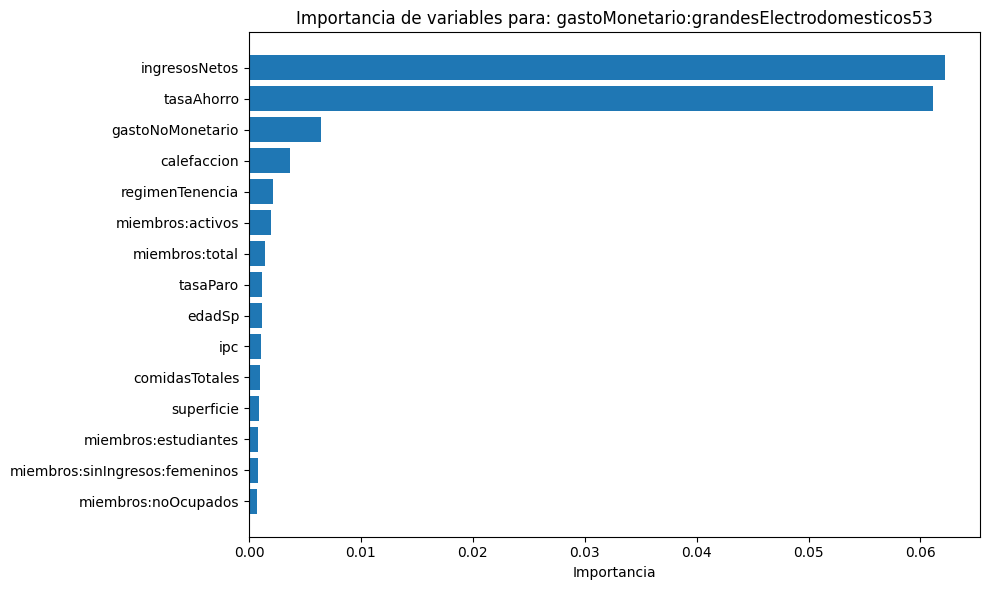

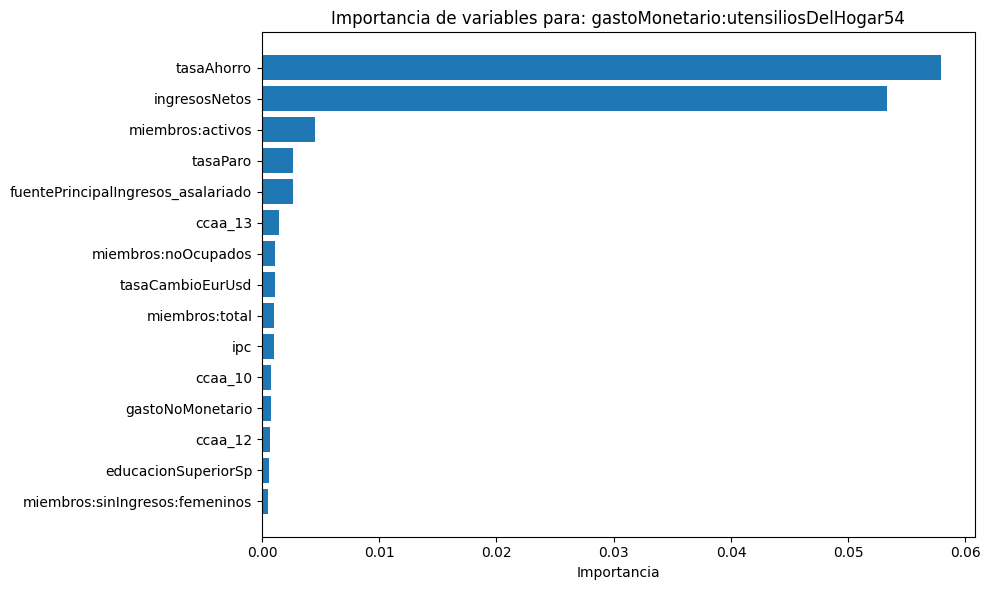

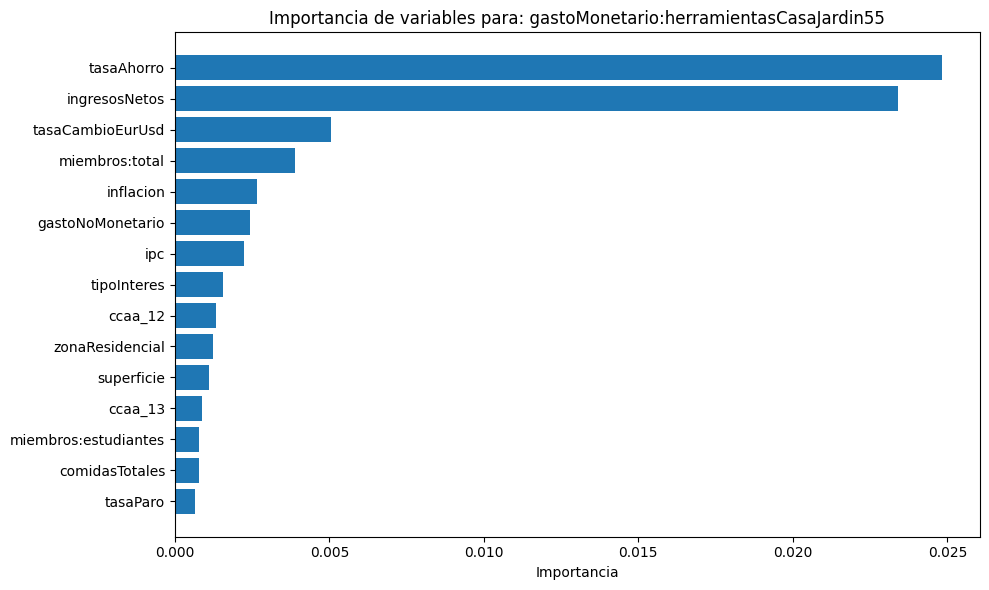

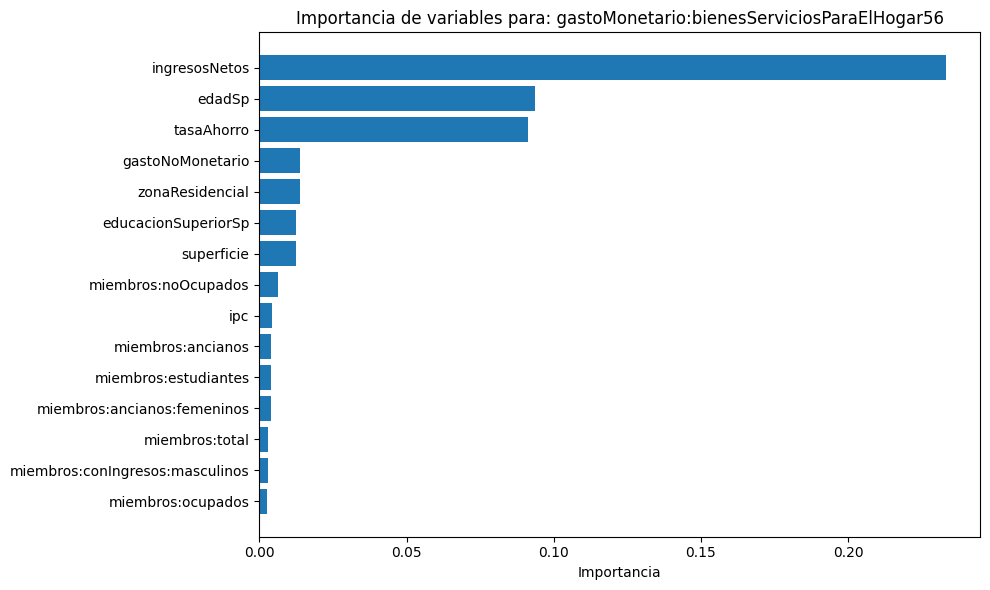

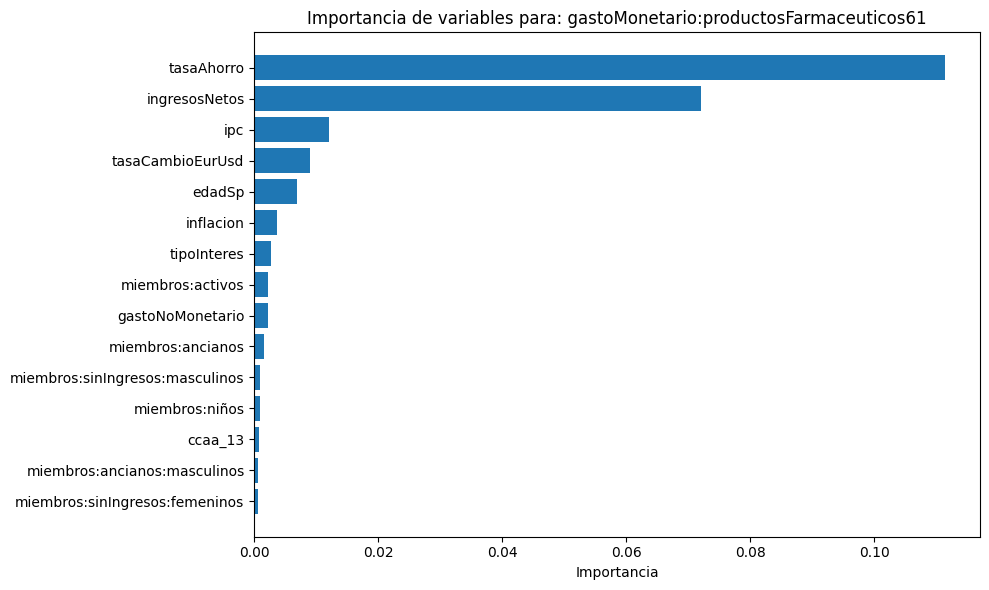

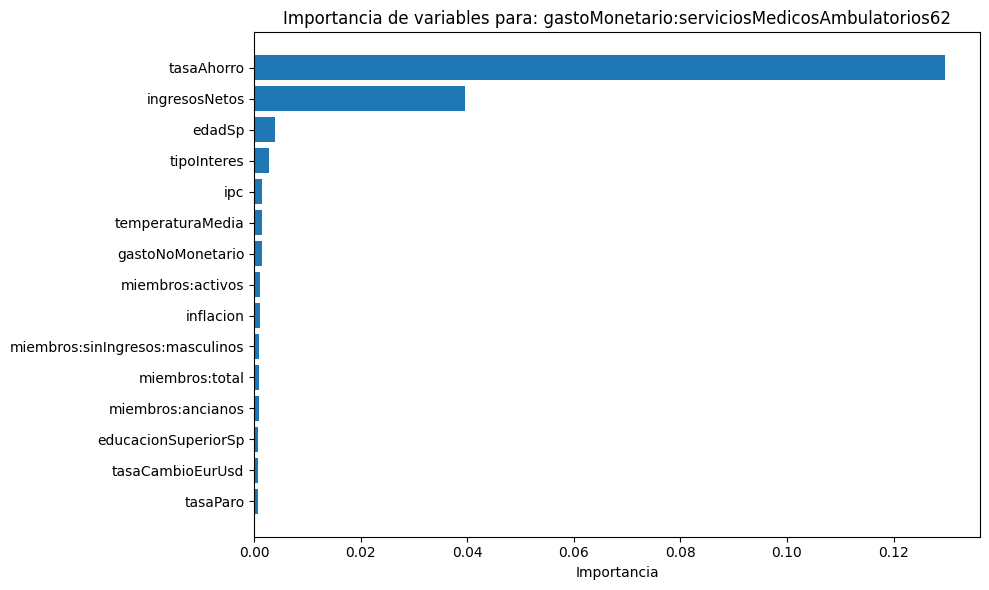

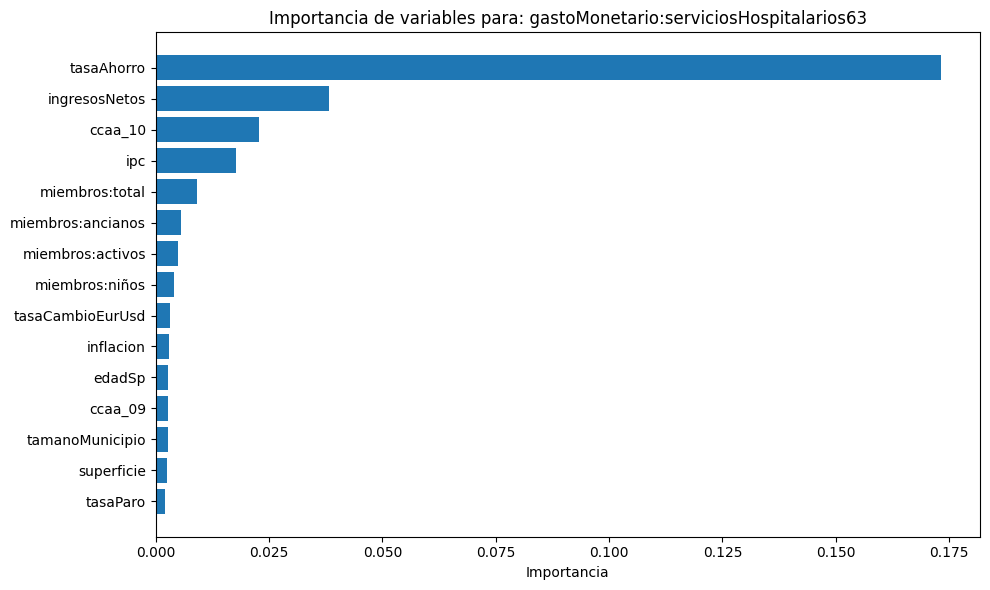

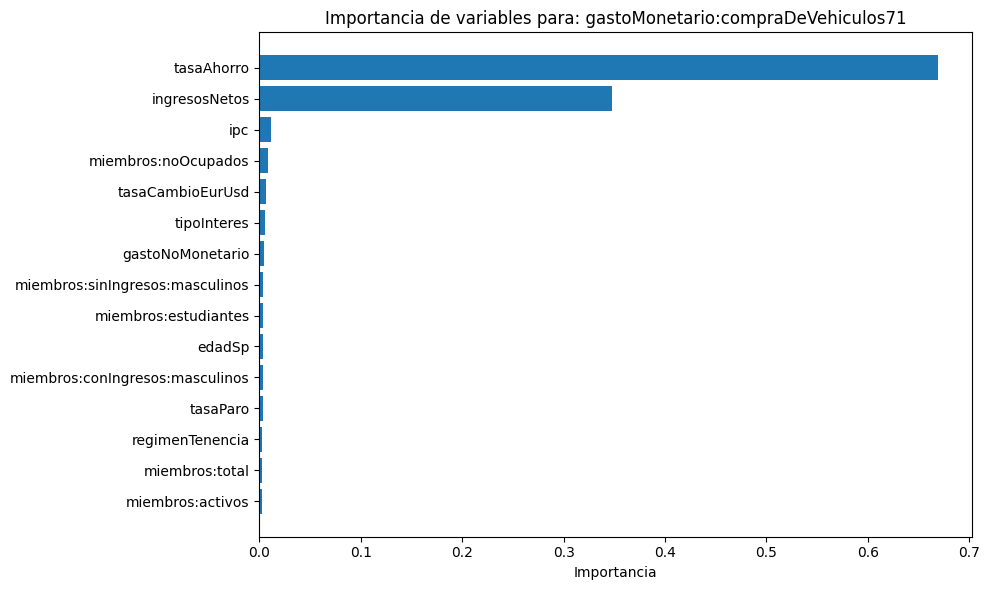

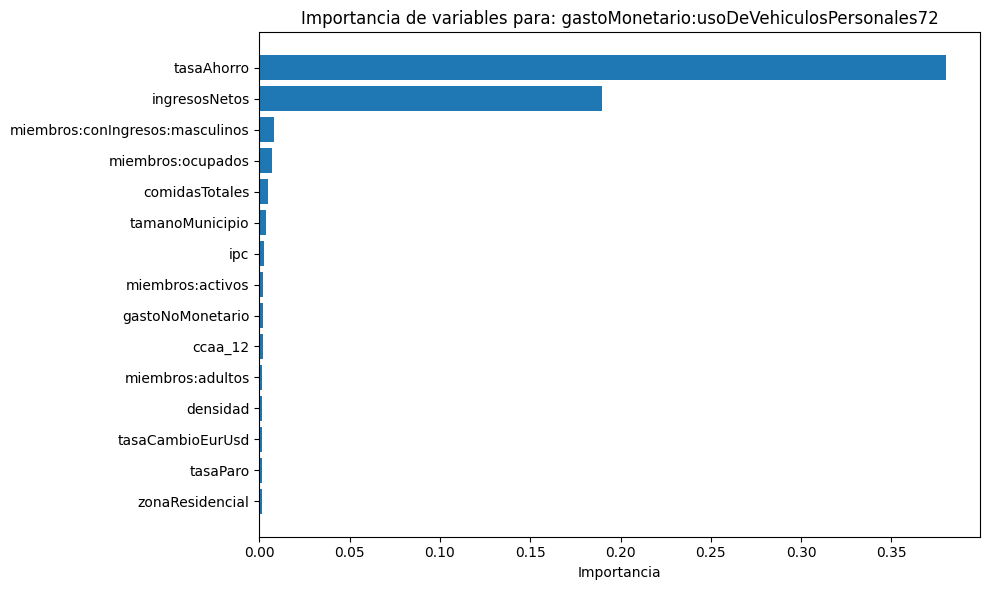

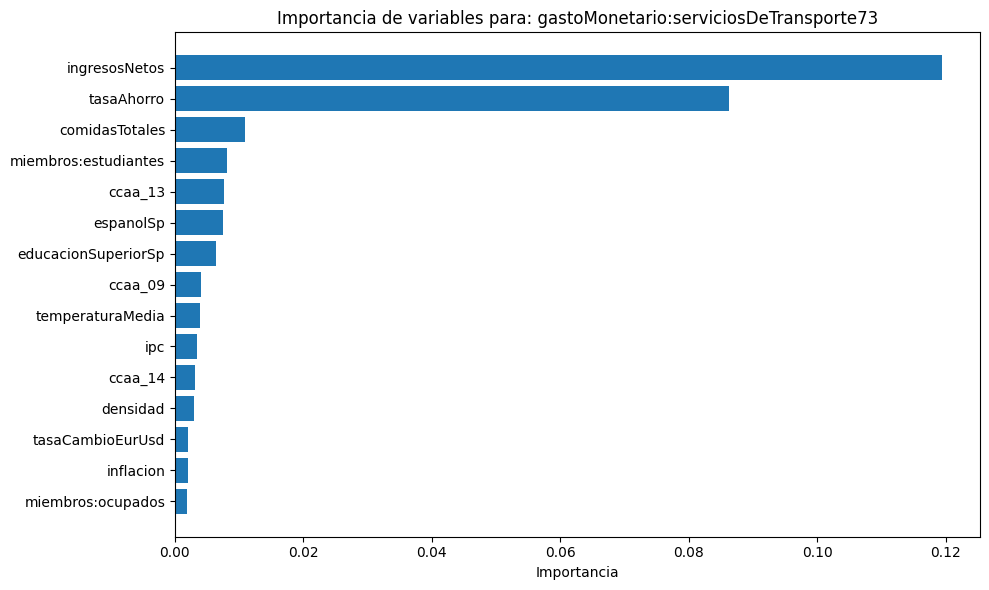

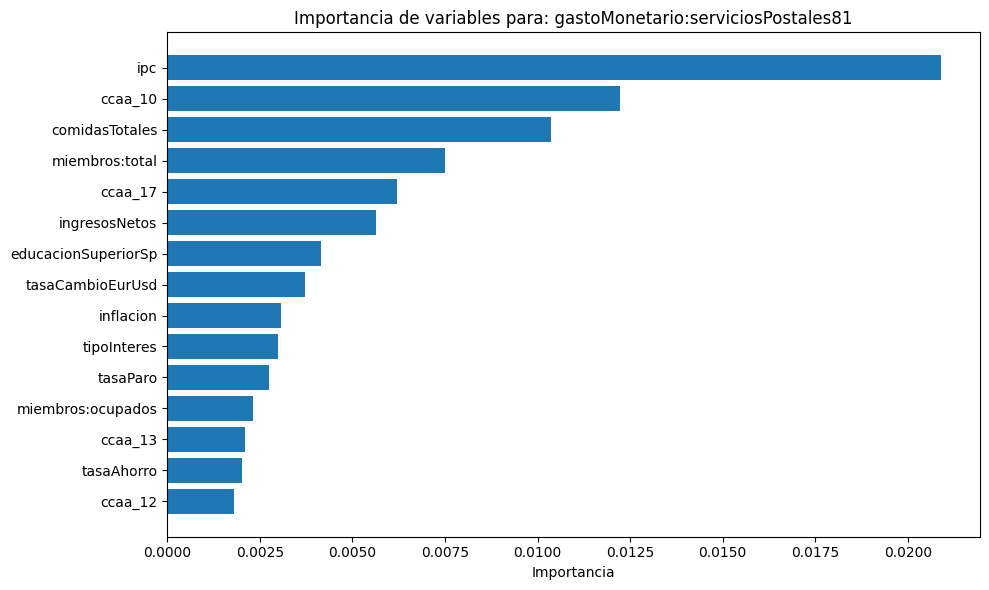

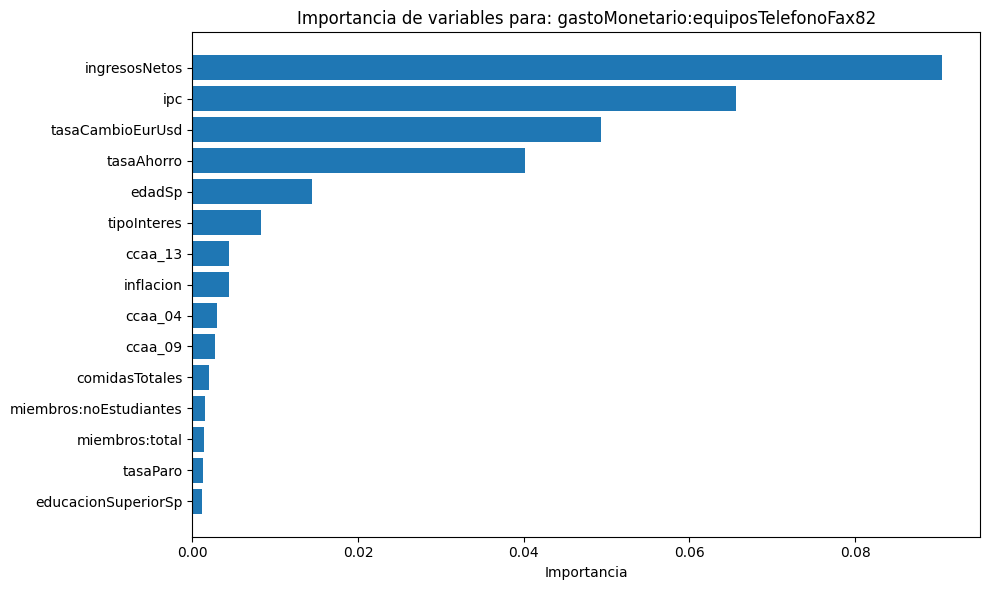

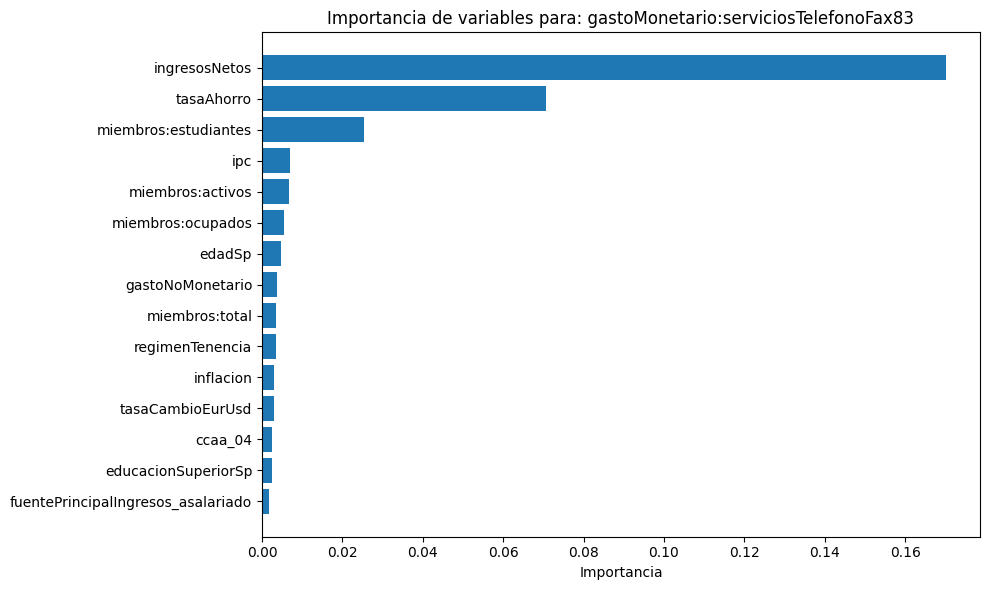

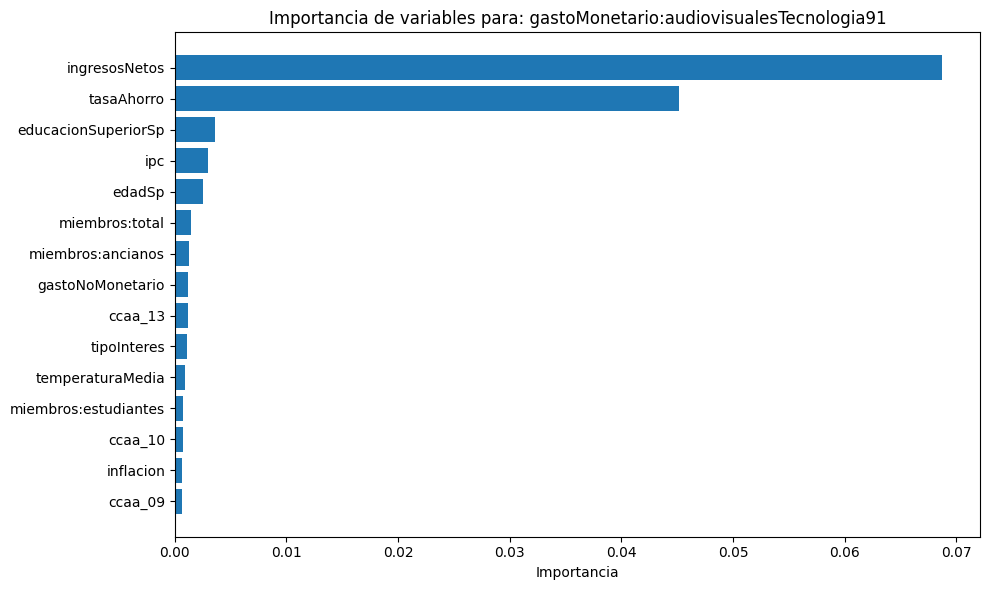

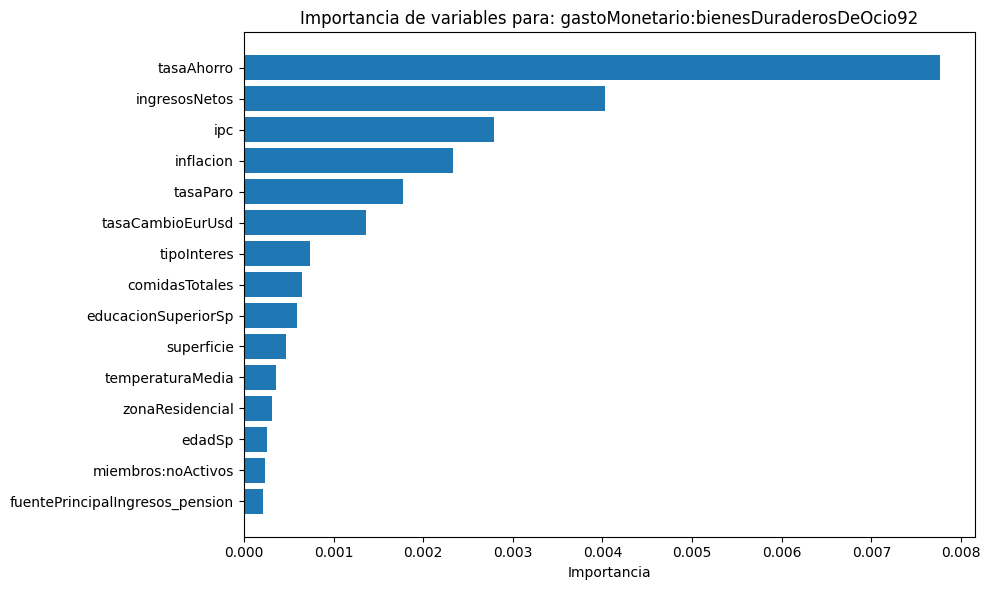

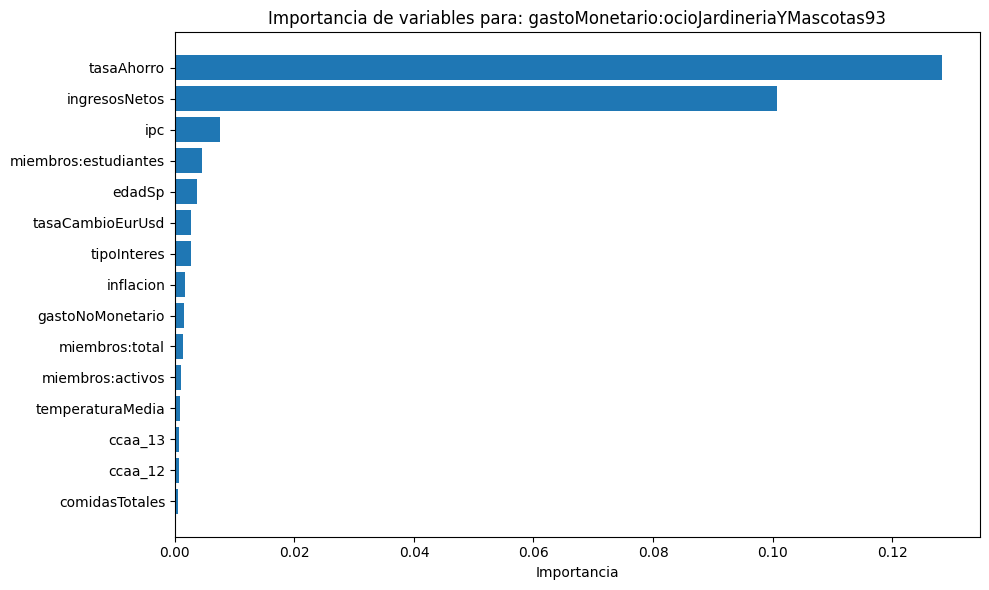

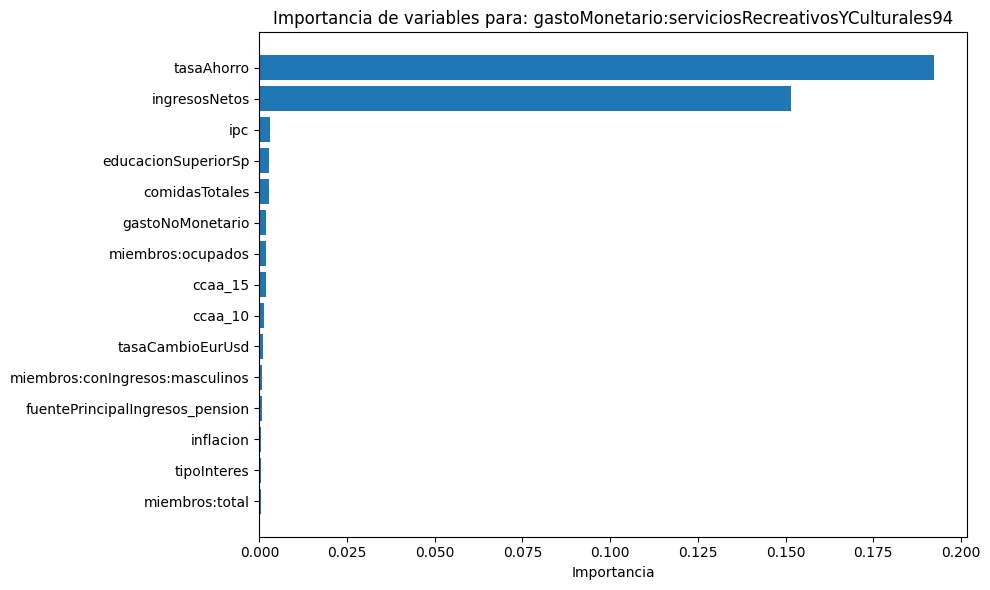

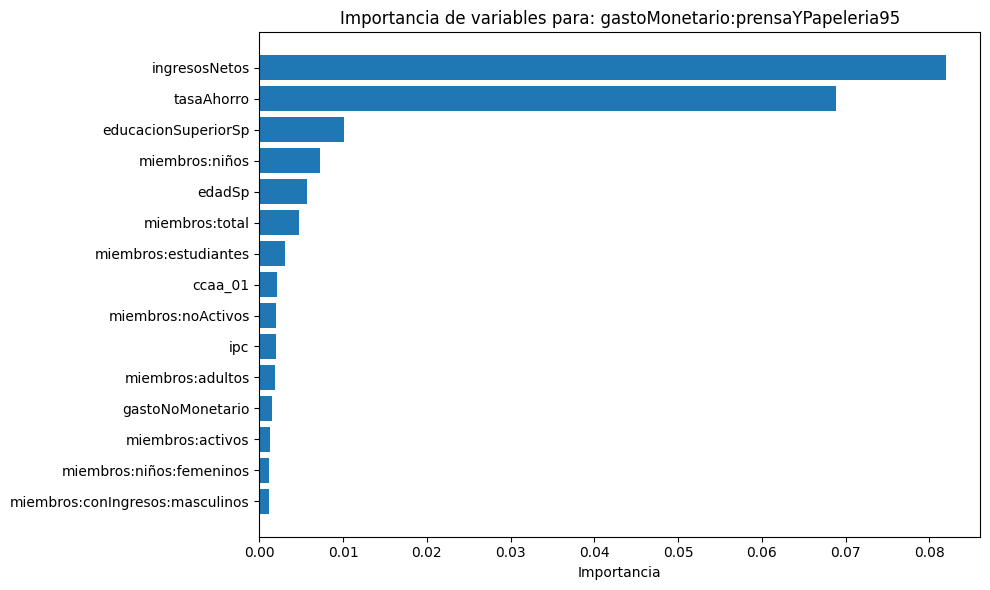

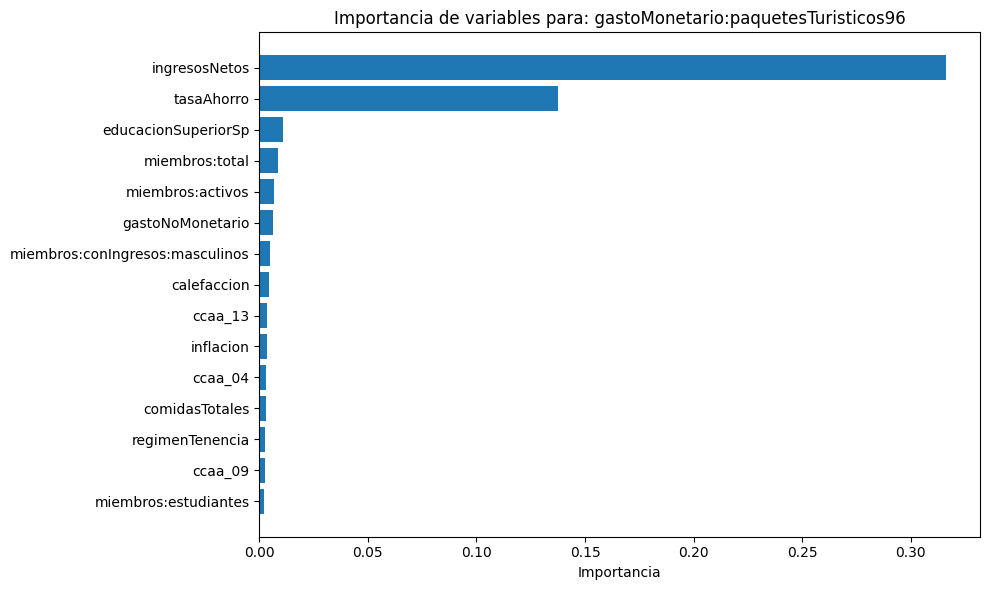

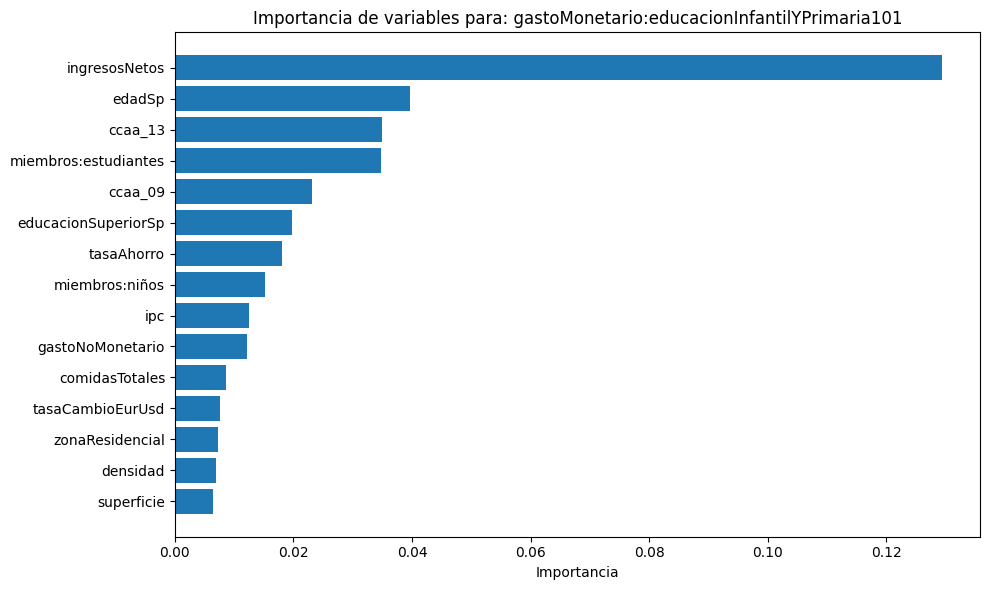

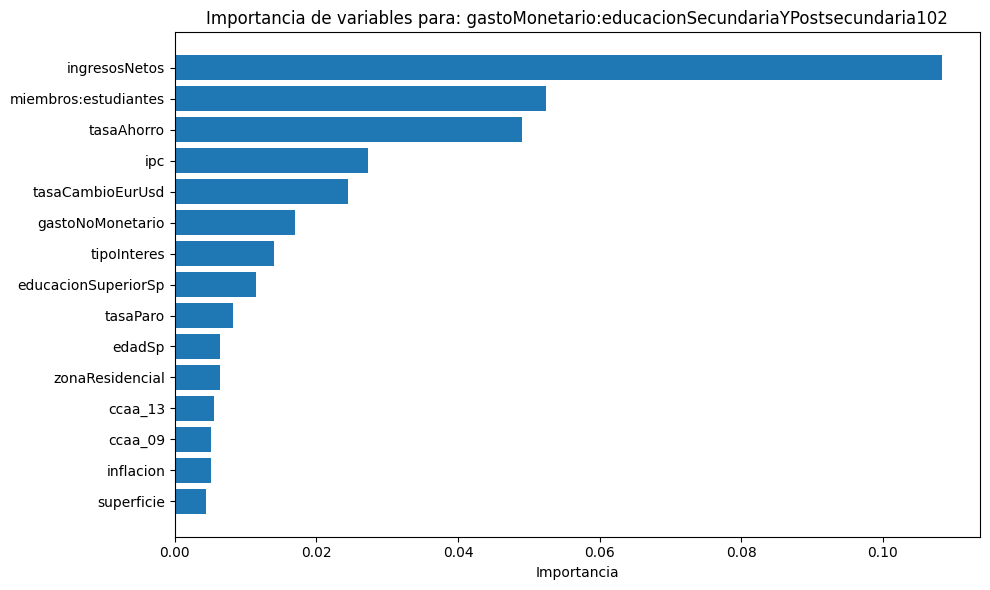

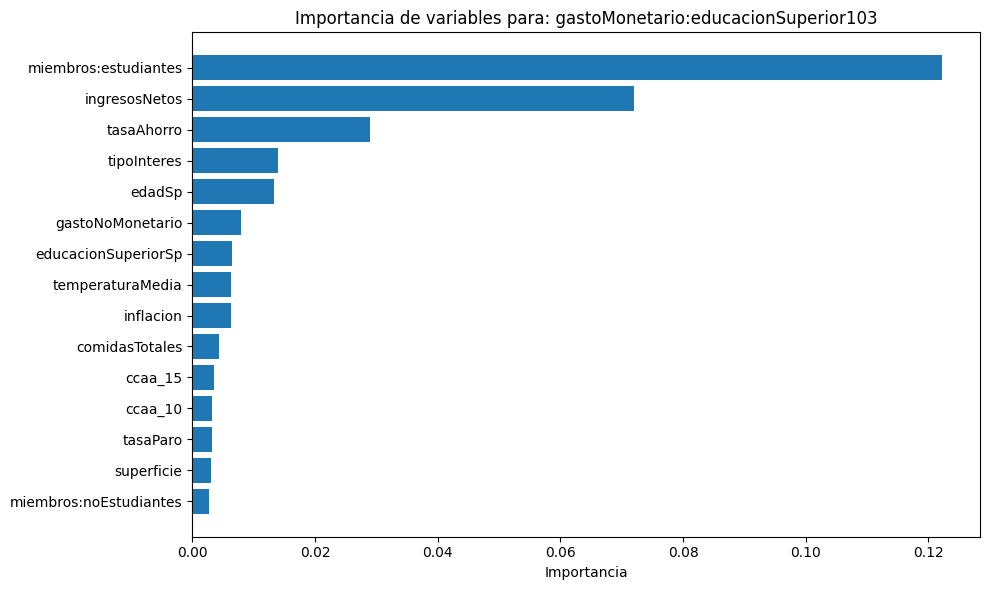

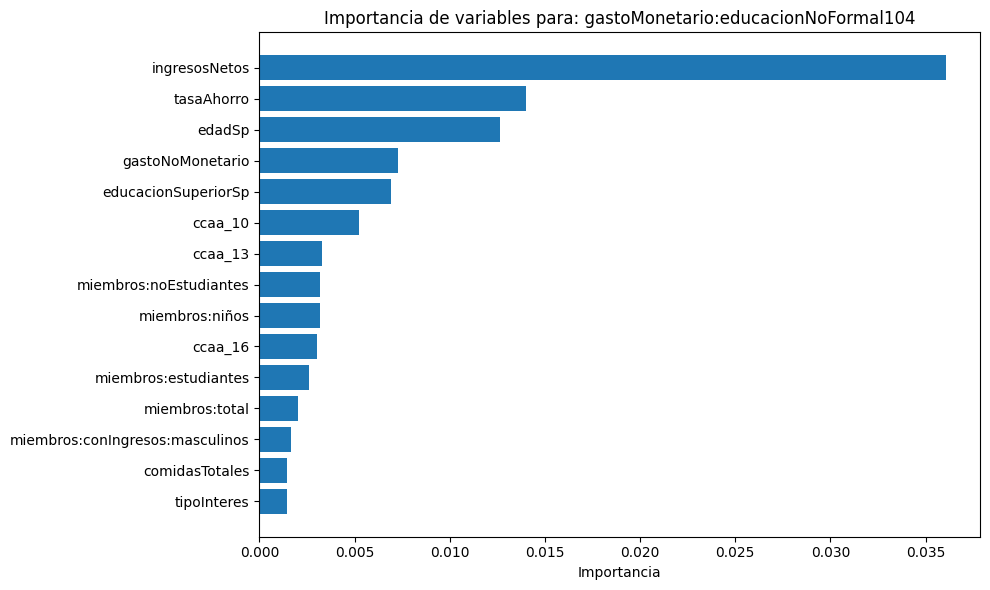

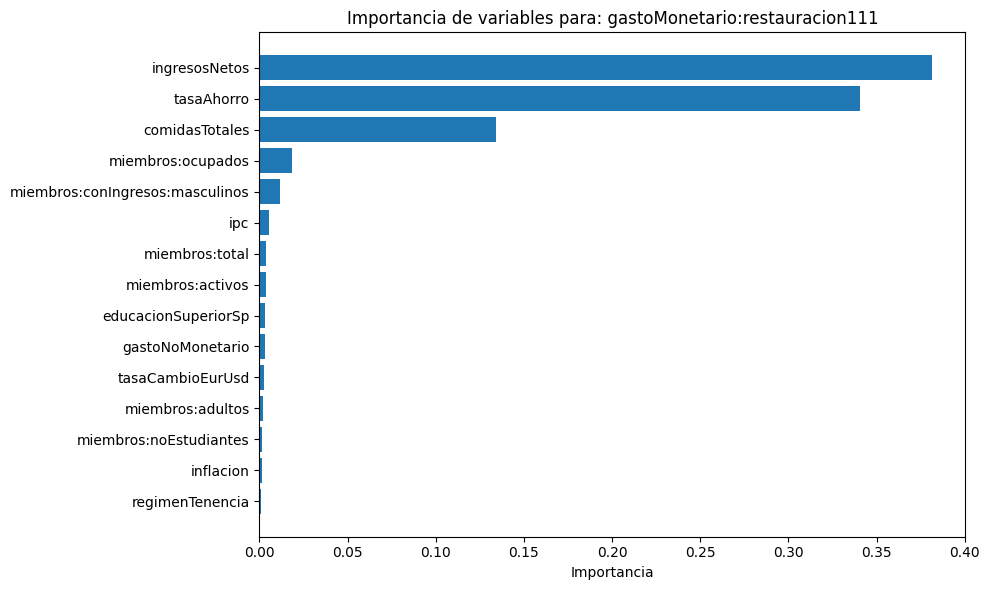

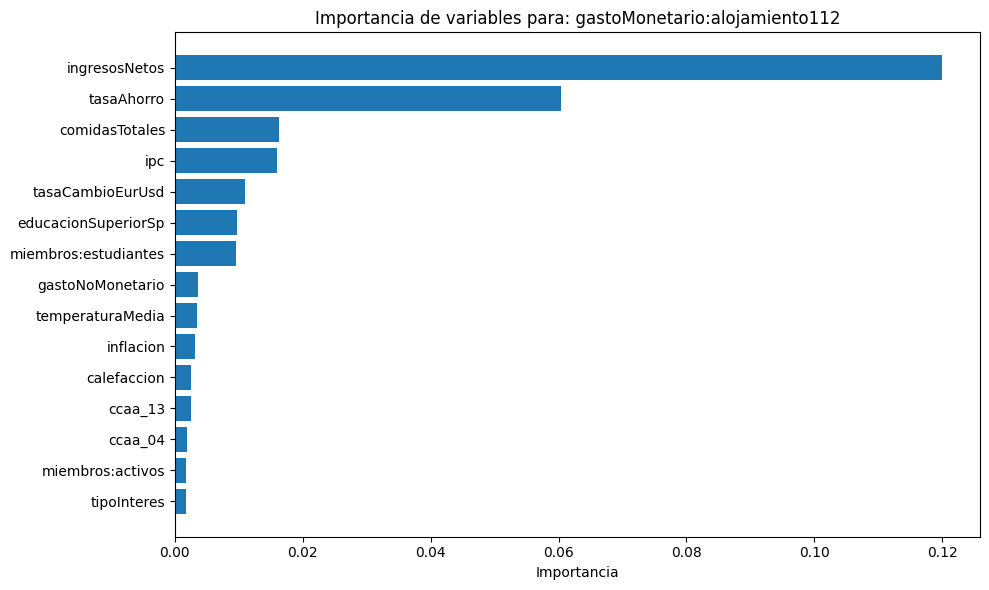

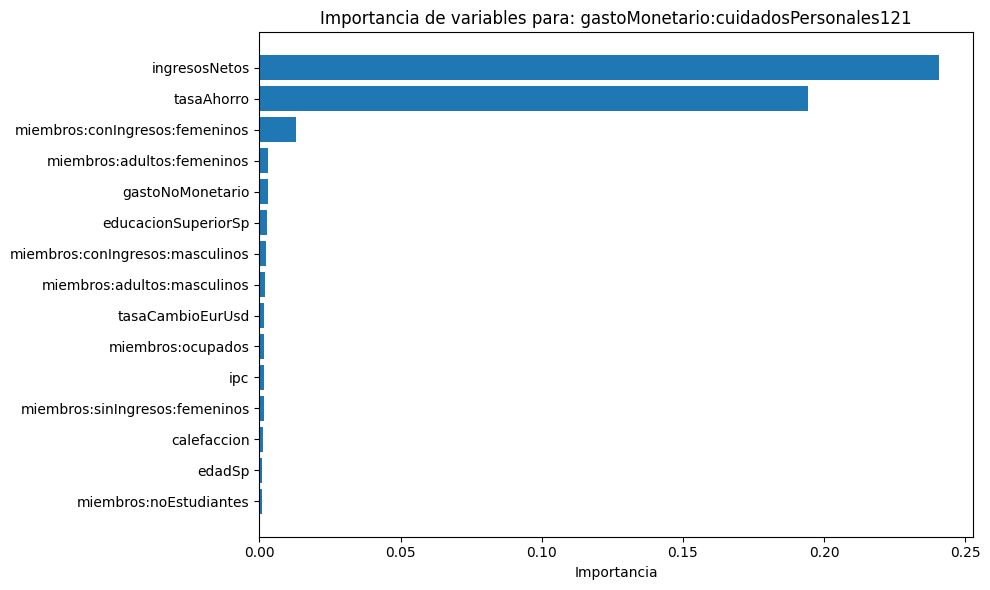

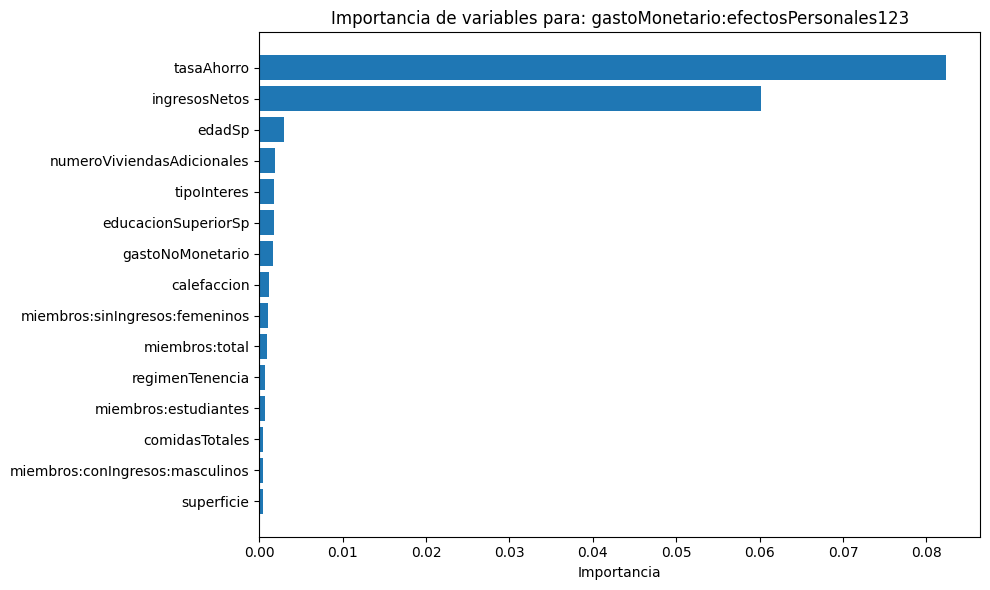

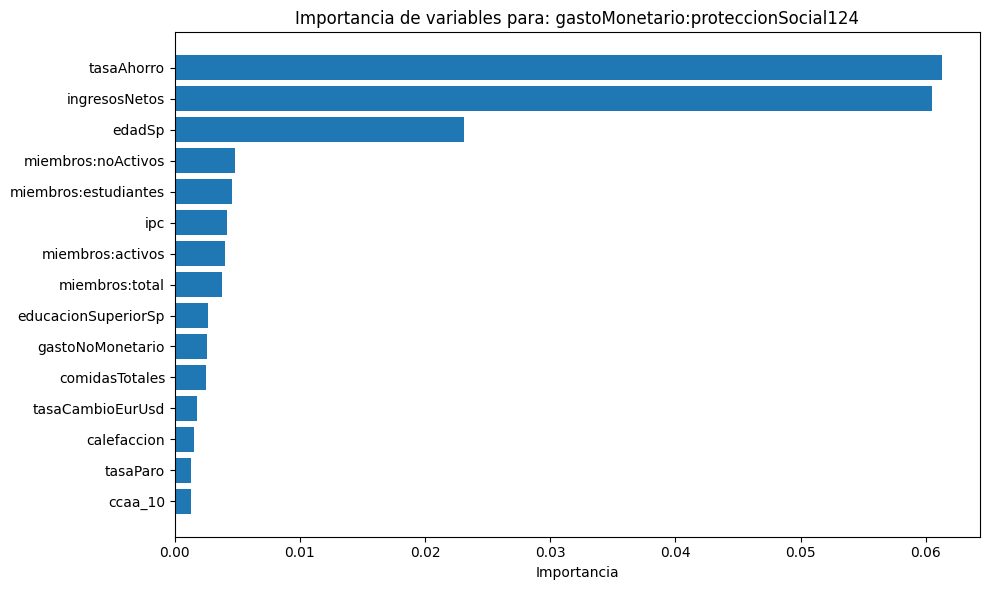

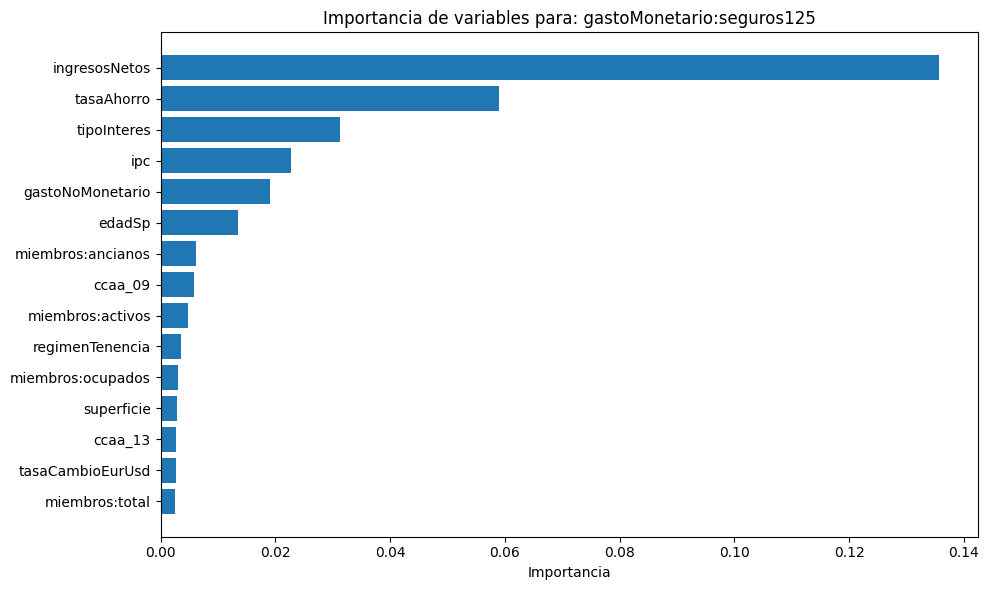

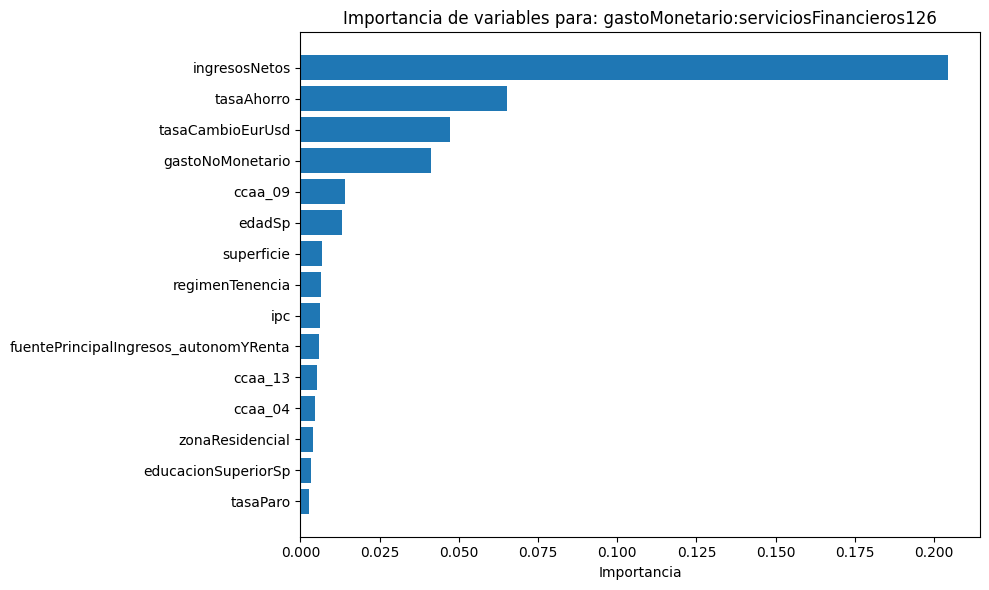

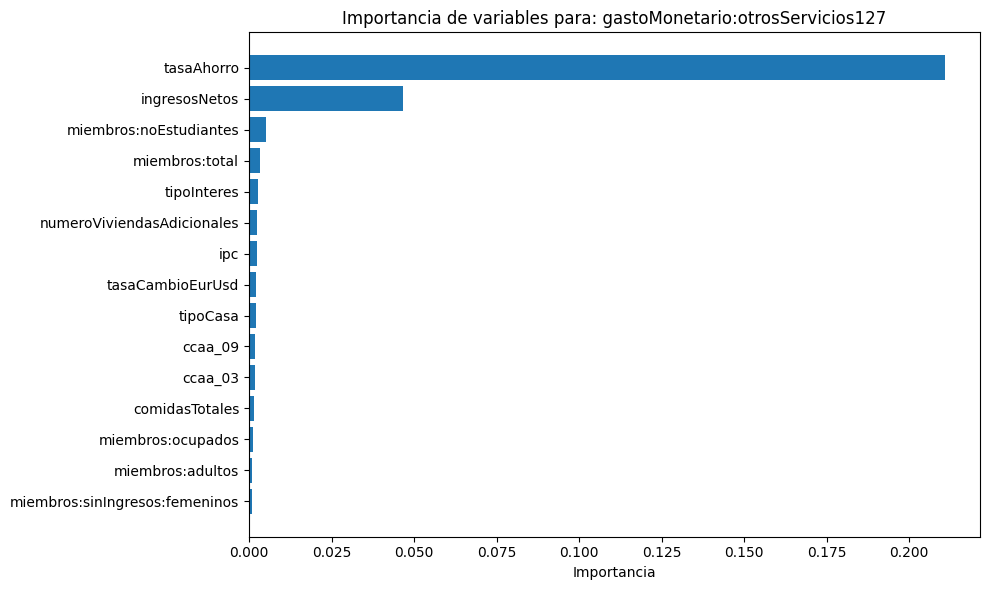

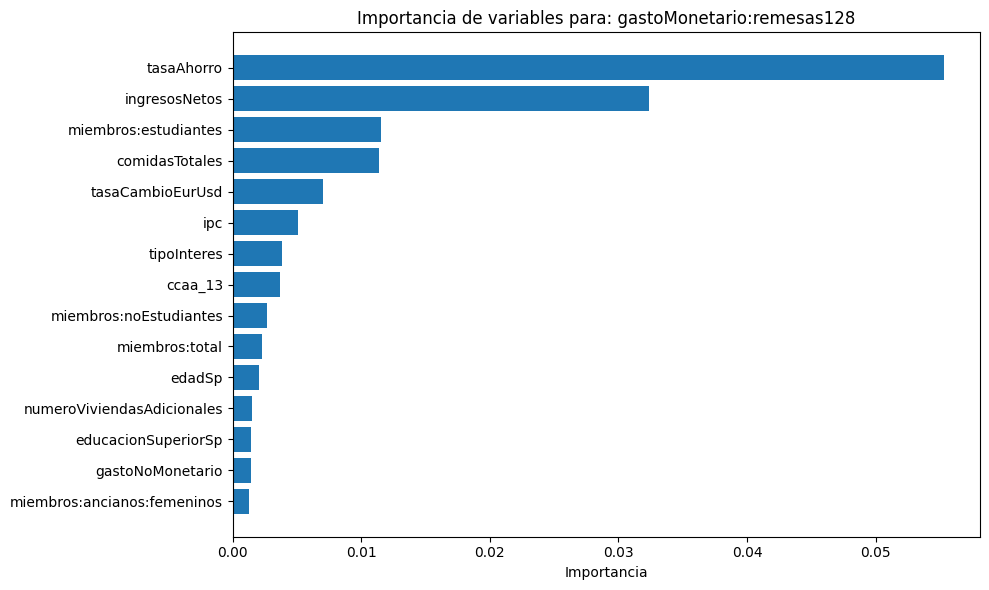

In [35]:
plot_feature_importances_by_target(importances_df)

In [36]:
# Save the coefficients DataFrame to a TSV file
importances_df.to_csv("../../datamarts/impotancia_por_categoria_no_lineal.tsv", sep="\t", index=True)

In [37]:
# Save the r2 DataFrame to a CSV file
r2_df.to_csv("../../datamarts/r2_por_categoria_no_lineal.tsv", sep="\t", index=False)

In [38]:
# ^Pivotear el DataFrame para que cada target tenga su propia columna de importancias
importances_pivoted = importances_df.pivot(index='Variable', columns='Target', values='Importance').reset_index()
importances_pivoted

Target                               Variable  gastoMonetario:alojamiento112  \
0                                aguaCaliente                       0.000000   
1                                 calefaccion                       0.002526   
2                            capitalProvincia                       0.000145   
3                                     ccaa_01                       0.000314   
4                                     ccaa_02                       0.000202   
5                                     ccaa_03                       0.000002   
6                                     ccaa_04                       0.001936   
7                                     ccaa_05                       0.000050   
8                                     ccaa_06                       0.000004   
9                                     ccaa_07                       0.000398   
10                                    ccaa_08                       0.000125   
11                                    ccaa_09                       0.000043   
12                                    ccaa_10                       0.000781   
13                                    ccaa_11                       0.000007   
14                                    ccaa_12                       0.000014   
15                                    ccaa_13                       0.002492   
16                                    ccaa_14                       0.000462   
17                                    ccaa_15                       0.000122   
18                                    ccaa_16                       0.000113   
19                                    ccaa_17                       0.000740   
20                                    ccaa_18                       0.000005   
21                                    ccaa_19                       0.000003   
22                             comidasTotales                       0.016237   
23                                   densidad                       0.000080   
24                                     edadSp                       0.001462   
25                        educacionSuperiorSp                       0.009644   
26                                  espanolSp                       0.000565   
27         fuentePrincipalIngresos_asalariado                       0.000071   
28      fuentePrincipalIngresos_autonomYRenta                       0.000154   
29            fuentePrincipalIngresos_pension                       0.000643   
30                           gastoNoMonetario                       0.003587   
31                                  inflacion                       0.003163   
32                              ingresosNetos                       0.119900   
33                                        ipc                       0.015984   
34                           miembros:activos                       0.001789   
35                           miembros:adultos                       0.001384   
36                 miembros:adultos:femeninos                       0.000339   
37                miembros:adultos:masculinos                       0.000136   
38                          miembros:ancianos                       0.000017   
39                miembros:ancianos:femeninos                      -0.000010   
40               miembros:ancianos:masculinos                       0.000020   
41             miembros:conIngresos:femeninos                       0.000185   
42            miembros:conIngresos:masculinos                       0.000837   
43                       miembros:estudiantes                       0.009532   
44                             miembros:niños                       0.000319   
45                   miembros:niños:femeninos                       0.000368   
46                  miembros:niños:masculinos                       0.000075   
47                         miembros:noActivos                       0.000259   
48                     miembros:noEstudiantes                       0.000272   


### Mapa de calor de los coeficientes por código

In [39]:
import seaborn as sns

In [40]:
import re

def renombrar_columnas_por_codigo(df, ignore_cols=None):
    """
    Renombra las columnas extrayendo el código numérico de su final
    (p. ej. de 'gastoMonetario:alojamiento112' deja '112', etc.),
    pero omite renombrar cualquier columna cuyo nombre esté en ignore_cols.
    
    Parámetros:
    - df: DataFrame de pandas.
    - ignore_cols: lista de nombres de columnas a excluir (por defecto ['variable']).
    """
    if ignore_cols is None:
        ignore_cols = ['Variable']
        
    patron = re.compile(r'(\d+)$')  

    mapping = {}
    
    for col in df.columns:
        if col in ignore_cols:
            continue
        m = patron.search(col)
        if m:
            mapping[col] = m.group(1)
    
    return df.rename(columns=mapping)


In [41]:
importances_pivoted

Target                               Variable  gastoMonetario:alojamiento112  \
0                                aguaCaliente                       0.000000   
1                                 calefaccion                       0.002526   
2                            capitalProvincia                       0.000145   
3                                     ccaa_01                       0.000314   
4                                     ccaa_02                       0.000202   
5                                     ccaa_03                       0.000002   
6                                     ccaa_04                       0.001936   
7                                     ccaa_05                       0.000050   
8                                     ccaa_06                       0.000004   
9                                     ccaa_07                       0.000398   
10                                    ccaa_08                       0.000125   
11                                    ccaa_09                       0.000043   
12                                    ccaa_10                       0.000781   
13                                    ccaa_11                       0.000007   
14                                    ccaa_12                       0.000014   
15                                    ccaa_13                       0.002492   
16                                    ccaa_14                       0.000462   
17                                    ccaa_15                       0.000122   
18                                    ccaa_16                       0.000113   
19                                    ccaa_17                       0.000740   
20                                    ccaa_18                       0.000005   
21                                    ccaa_19                       0.000003   
22                             comidasTotales                       0.016237   
23                                   densidad                       0.000080   
24                                     edadSp                       0.001462   
25                        educacionSuperiorSp                       0.009644   
26                                  espanolSp                       0.000565   
27         fuentePrincipalIngresos_asalariado                       0.000071   
28      fuentePrincipalIngresos_autonomYRenta                       0.000154   
29            fuentePrincipalIngresos_pension                       0.000643   
30                           gastoNoMonetario                       0.003587   
31                                  inflacion                       0.003163   
32                              ingresosNetos                       0.119900   
33                                        ipc                       0.015984   
34                           miembros:activos                       0.001789   
35                           miembros:adultos                       0.001384   
36                 miembros:adultos:femeninos                       0.000339   
37                miembros:adultos:masculinos                       0.000136   
38                          miembros:ancianos                       0.000017   
39                miembros:ancianos:femeninos                      -0.000010   
40               miembros:ancianos:masculinos                       0.000020   
41             miembros:conIngresos:femeninos                       0.000185   
42            miembros:conIngresos:masculinos                       0.000837   
43                       miembros:estudiantes                       0.009532   
44                             miembros:niños                       0.000319   
45                   miembros:niños:femeninos                       0.000368   
46                  miembros:niños:masculinos                       0.000075   
47                         miembros:noActivos                       0.000259   
48                     miembros:noEstudiantes                       0.000272   


In [42]:
def generar_mapa_calor_importancias(df, figsize=(22, 14), vmax=0.05, output_path=None):
    """
    Genera un mapa de calor con las columnas (códigos de gasto) ordenadas numéricamente.
    
    Args:
        df (pd.DataFrame): DataFrame con variables como filas y categorías como columnas.
        figsize (tuple): Tamaño de la figura.
        vmax (float): Valor máximo para la escala de color.
        output_path (str): Ruta opcional para guardar el mapa.
    """
    df_codificado = renombrar_columnas_por_codigo(df.copy())
    data = df_codificado.drop(columns=["Target", "Variable"], errors="ignore")
    data.index = df_codificado["Variable"] if "Variable" in df_codificado.columns else df_codificado.index

    # Reordenar columnas por valor numérico del código
    columnas_ordenadas = sorted(data.columns, key=lambda x: float(x.replace("_", ".")))
    data = data[columnas_ordenadas]

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        data,
        cmap="Reds",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        linecolor="gray",
        vmin=0,
        vmax=vmax,
        cbar_kws={"label": "Importancia relativa"}
    )

    plt.title("Mapa de calor de importancias por variable y categoría de gasto", fontsize=14)
    plt.xlabel("Código de Categoría de Gasto")
    plt.ylabel("Variable")
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()

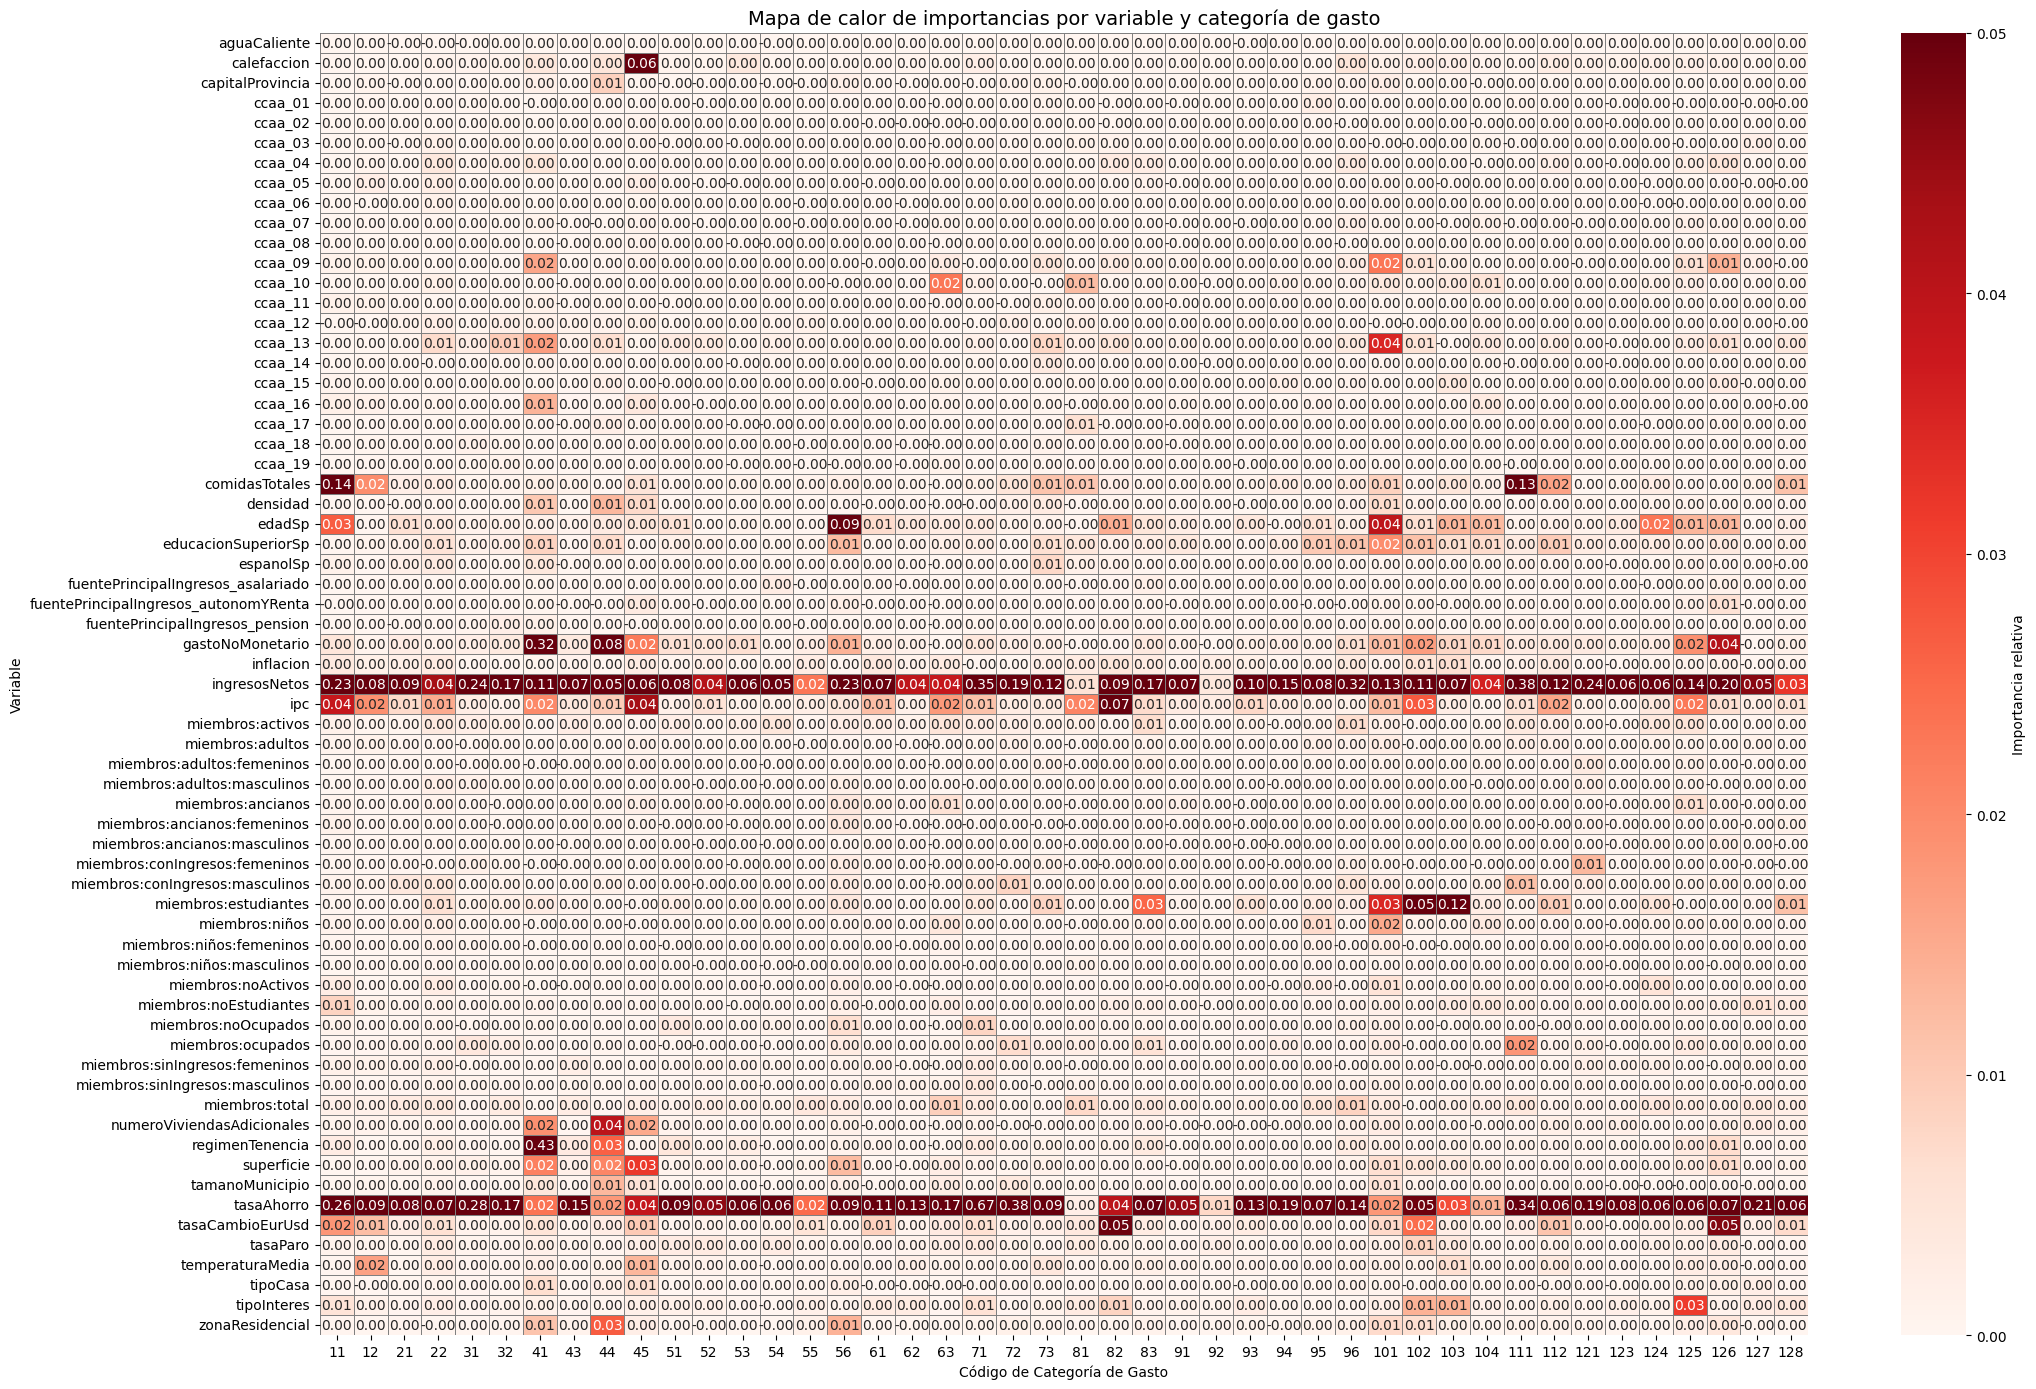

In [43]:
generar_mapa_calor_importancias(importances_pivoted)

### Analisis de sensibilidad no lineal (Busqueda de mejor modelo)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

In [47]:
def train_models_per_category(
    df,
    output_columns,
    models=None,
    hidden_layer_sizes=(128, 64, 32),
    max_iter=500,
    top_n=10
):
    """
    Entrena múltiples modelos para cada variable objetivo y calcula métricas e importancias.

    Parámetros:
    - df: DataFrame con datos, incluye columnas de entrada numéricas y columnas de salida.
    - output_columns: lista de nombres de columnas objetivo.
    - models: diccionario opcional {'name': estimator_instance}. Si no se proporciona, usa MLP, Random Forest y Gradient Boosting.
    - hidden_layer_sizes, max_iter: parámetros para MLP si se incluye.
    - top_n: número de variables más importantes a mostrar.

    Retorna:
    - r2_df: DataFrame con R² para cada modelo y objetivo.
    - mse_df: DataFrame con MSE para cada modelo y objetivo.
    - importances_df: DataFrame concatenado de importancias de todas las combinaciones.
    - r2_pivot: DataFrame con R² de cada modelo en columnas por Target.
    """
    # Definir modelos por defecto
    if models is None:
        models = {
            'MLP': MLPRegressor(
                hidden_layer_sizes=hidden_layer_sizes,
                activation='relu',
                solver='adam',
                early_stopping=True,
                n_iter_no_change=10,
                validation_fraction=0.1,
                max_iter=max_iter,
                random_state=42
            ),
            'RandomForest': RandomForestRegressor(
                n_estimators=100,
                random_state=42
            ),
            'GradientBoosting': GradientBoostingRegressor(
                n_estimators=100,
                learning_rate=0.1,
                random_state=42
            )
        }

    # Preparar características de entrada
    excluded = output_columns + ['timestamp'] if 'timestamp' in df.columns else output_columns
    input_features = [c for c in df.select_dtypes(include='number').columns if c not in excluded]

    # Listas para almacenar resultados
    r2_records = []
    mse_records = []
    all_importances = []

    for name, model in models.items():
        for target in output_columns:
            print(f"\n🔧 Entrenando {name} para objetivo {target}...")

            df_clean = df.dropna(subset=[target] + input_features)
            if df_clean.shape[0] < len(input_features) + 10:
                print("❌ No hay datos suficientes. Se omite.")
                continue

            X = df_clean[input_features]
            y = df_clean[target]

            # Separar datos
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )

            # Normalizar (solo para MLP)
            if name == 'MLP':
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

            # Entrenar modelo
            model.fit(X_train, y_train)

            # Predecir y evaluar
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            print(f"✅ {name} - R²: {r2:.4f}, MSE: {mse:.4f}")

            # Importancia por permutación
            # print("🔍 Calculando importancias por permutación...")
            # result = permutation_importance(
            #     model,
            #     X_test,
            #     y_test,
            #     n_repeats=5,
            #     random_state=42,
            #     n_jobs=1
            # )
            # imp_df = pd.DataFrame({
            #     'Model': name,
            #     'Target': target,
            #     'Variable': input_features,
            #     'Importance': result.importances_mean
            # }).sort_values(by='Importance', ascending=False)

            # print(f"📊 Top {top_n} variables para {name} en {target}:")
            # print(imp_df.head(top_n).to_string(index=False))

            # Guardar resultados
            r2_records.append({'Model': name, 'Target': target, 'R2': r2})
            mse_records.append({'Model': name, 'Target': target, 'MSE': mse})
            # all_importances.append(imp_df)

    # Crear DataFrames de resultados
    r2_df = pd.DataFrame(r2_records)
    mse_df = pd.DataFrame(mse_records)
    # importances_df = pd.concat(all_importances, ignore_index=True)

    # Pivot para ver R² de cada modelo en la misma fila por Target
    r2_df = r2_df.pivot(index='Target', columns='Model', values='R2').reset_index()

    return r2_df, mse_df #, importances_df



In [48]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]

r2_df, mse_df = train_models_per_category(df, output_columns)



🔧 Entrenando MLP para objetivo gastoMonetario:productosAlimenticios11...
✅ MLP - R²: 0.4507, MSE: 3300745.5469

🔧 Entrenando MLP para objetivo gastoMonetario:bebidasNoAlcoholicas12...
✅ MLP - R²: 0.1289, MSE: 94296.1785

🔧 Entrenando MLP para objetivo gastoMonetario:bebidasAlcoholicas21...
✅ MLP - R²: 0.0819, MSE: 203407.9295

🔧 Entrenando MLP para objetivo gastoMonetario:tabaco22...
✅ MLP - R²: 0.0905, MSE: 733915.3030

🔧 Entrenando MLP para objetivo gastoMonetario:articulosDeVestir31...
✅ MLP - R²: 0.2088, MSE: 3170980.3330

🔧 Entrenando MLP para objetivo gastoMonetario:calzado32...
✅ MLP - R²: 0.1594, MSE: 376888.3223

🔧 Entrenando MLP para objetivo gastoMonetario:alquileresRealesDeLaVivienda41...
✅ MLP - R²: 0.7872, MSE: 1472651.4474

🔧 Entrenando MLP para objetivo gastoMonetario:mantenimientoDeLaVivienda43...
✅ MLP - R²: 0.0764, MSE: 3770728.8103

🔧 Entrenando MLP para objetivo gastoMonetario:suministroDeAgua44...
✅ MLP - R²: 0.3828, MSE: 348692.3382

🔧 Entrenando MLP para objeti

In [51]:
r2_df

Model                                             Target  GradientBoosting  \
0                          gastoMonetario:alojamiento112          0.196031   
1          gastoMonetario:alquileresRealesDeLaVivienda41          0.743905   
2                     gastoMonetario:articulosDeVestir31          0.208151   
3               gastoMonetario:audiovisualesTecnologia91          0.067384   
4                    gastoMonetario:bebidasAlcoholicas21          0.075924   
5                  gastoMonetario:bebidasNoAlcoholicas12          0.157574   
6                 gastoMonetario:bienesDuraderosDeOcio92          0.018114   
7            gastoMonetario:bienesServiciosParaElHogar56          0.249466   
8                               gastoMonetario:calzado32          0.163416   
9                     gastoMonetario:compraDeVehiculos71          0.462555   
10                  gastoMonetario:cuidadosPersonales121          0.211869   
11          gastoMonetario:educacionInfantilYPrimaria101          0.348735   
12                   gastoMonetario:educacionNoFormal104          0.103489   
13     gastoMonetario:educacionSecundariaYPostsecunda...          0.334575   
14                   gastoMonetario:educacionSuperior103          0.220201   
15                   gastoMonetario:efectosPersonales123          0.035171   
16     gastoMonetario:electricidadGasOtrosCombustibles45          0.353334   
17                   gastoMonetario:equiposTelefonoFax82          0.232273   
18             gastoMonetario:grandesElectrodomesticos53          0.060518   
19               gastoMonetario:herramientasCasaJardin55          0.043811   
20            gastoMonetario:mantenimientoDeLaVivienda43          0.082266   
21                gastoMonetario:mueblesRevestimientos51          0.090080   
22              gastoMonetario:ocioJardineriaYMascotas93          0.097770   
23                      gastoMonetario:otrosServicios127          0.238768   
24                   gastoMonetario:paquetesTuristicos96          0.200823   
25                     gastoMonetario:prensaYPapeleria95          0.113533   
26                gastoMonetario:productosAlimenticios11          0.437256   
27               gastoMonetario:productosFarmaceuticos61          0.115110   
28                    gastoMonetario:proteccionSocial124          0.061503   
29                             gastoMonetario:remesas128          0.081466   
30                        gastoMonetario:restauracion111          0.394723   
31                             gastoMonetario:seguros125          0.218371   
32                gastoMonetario:serviciosDeTransporte73          0.137595   
33                gastoMonetario:serviciosFinancieros126          0.340873   
34               gastoMonetario:serviciosHospitalarios63          0.181351   
35         gastoMonetario:serviciosMedicosAmbulatorios62          0.074523   
36                    gastoMonetario:serviciosPostales81          0.051708   
37      gastoMonetario:serviciosRecreativosYCulturales94         -0.068200   
38                 gastoMonetario:serviciosTelefonoFax83          0.289213   
39                     gastoMonetario:suministroDeAgua44          0.357133   
40                               gastoMonetario:tabaco22          0.110708   
41                  gastoMonetario:textilesParaElHogar52          0.061758   
42             gastoMonetario:usoDeVehiculosPersonales72          0.253278   
43                   gastoMonetario:utensiliosDelHogar54          0.021708   

Model        MLP  RandomForest  
0      -0.730367      0.182117  
1       0.787167      0.792605  
2       0.208788      0.187517  
3       0.060740      0.001976  
4       0.081902      0.020586  
5       0.128913      0.138887  
6       0.031142      0.033139  
7       0.292630      0.292033  
8       0.159423      0.130536  
9       0.465714      0.457644  
10      0.202017      0.174894  
11      0.360486      0.351536  
12      0.098130      0.094587  
13      0.302376      0.353

In [52]:
# ordena r2_df por R² descendente
r2_df = r2_df.sort_values(by=list(r2_df.columns[1:]), ascending=False)

In [53]:
r2_df

Model                                             Target  GradientBoosting  \
1          gastoMonetario:alquileresRealesDeLaVivienda41          0.743905   
9                     gastoMonetario:compraDeVehiculos71          0.462555   
26                gastoMonetario:productosAlimenticios11          0.437256   
30                        gastoMonetario:restauracion111          0.394723   
39                     gastoMonetario:suministroDeAgua44          0.357133   
16     gastoMonetario:electricidadGasOtrosCombustibles45          0.353334   
11          gastoMonetario:educacionInfantilYPrimaria101          0.348735   
33                gastoMonetario:serviciosFinancieros126          0.340873   
13     gastoMonetario:educacionSecundariaYPostsecunda...          0.334575   
38                 gastoMonetario:serviciosTelefonoFax83          0.289213   
42             gastoMonetario:usoDeVehiculosPersonales72          0.253278   
7            gastoMonetario:bienesServiciosParaElHogar56          0.249466   
23                      gastoMonetario:otrosServicios127          0.238768   
17                   gastoMonetario:equiposTelefonoFax82          0.232273   
14                   gastoMonetario:educacionSuperior103          0.220201   
31                             gastoMonetario:seguros125          0.218371   
10                  gastoMonetario:cuidadosPersonales121          0.211869   
2                     gastoMonetario:articulosDeVestir31          0.208151   
24                   gastoMonetario:paquetesTuristicos96          0.200823   
0                          gastoMonetario:alojamiento112          0.196031   
34               gastoMonetario:serviciosHospitalarios63          0.181351   
8                               gastoMonetario:calzado32          0.163416   
5                  gastoMonetario:bebidasNoAlcoholicas12          0.157574   
32                gastoMonetario:serviciosDeTransporte73          0.137595   
27               gastoMonetario:productosFarmaceuticos61          0.115110   
25                     gastoMonetario:prensaYPapeleria95          0.113533   
40                               gastoMonetario:tabaco22          0.110708   
12                   gastoMonetario:educacionNoFormal104          0.103489   
22              gastoMonetario:ocioJardineriaYMascotas93          0.097770   
21                gastoMonetario:mueblesRevestimientos51          0.090080   
20            gastoMonetario:mantenimientoDeLaVivienda43          0.082266   
29                             gastoMonetario:remesas128          0.081466   
4                    gastoMonetario:bebidasAlcoholicas21          0.075924   
35         gastoMonetario:serviciosMedicosAmbulatorios62          0.074523   
3               gastoMonetario:audiovisualesTecnologia91          0.067384   
41                  gastoMonetario:textilesParaElHogar52          0.061758   
28                    gastoMonetario:proteccionSocial124          0.061503   
18             gastoMonetario:grandesElectrodomesticos53          0.060518   
36                    gastoMonetario:serviciosPostales81          0.051708   
19               gastoMonetario:herramientasCasaJardin55          0.043811   
15                   gastoMonetario:efectosPersonales123          0.035171   
43                   gastoMonetario:utensiliosDelHogar54          0.021708   
6                 gastoMonetario:bienesDuraderosDeOcio92          0.018114   
37      gastoMonetario:serviciosRecreativosYCulturales94         -0.068200   

Model        MLP  RandomForest  
1       0.787167      0.792605  
9       0.465714      0.457644  
26      0.450690      0.438467  
30      0.388108      0.393574  
39      0.382765      0.375781  
16      0.374749      0.362414  
11      0.360486      0.351536  
33      0.137029      0.343409  
13      0.302376      0.353037  
38      0.301278      0.292342  
42      0.247048      0.226919  
7       0.292630      0.292033  
23    -82.575712      0.236740  
17      0.081824      0.196

In [58]:

# quiero ver cuantas veces aparece cada modelo como el mejor
best_model_counts = r2_df['Best Model'].value_counts()

best_model_counts

GradientBoosting    20
MLP                 18
RandomForest         6
Name: Best Model, dtype: int64

In [61]:
mse_df

Model                                             Target  \
0                 MLP             gastoMonetario:productosAlimenticios11   
1                 MLP              gastoMonetario:bebidasNoAlcoholicas12   
2                 MLP                gastoMonetario:bebidasAlcoholicas21   
3                 MLP                            gastoMonetario:tabaco22   
4                 MLP                 gastoMonetario:articulosDeVestir31   
5                 MLP                           gastoMonetario:calzado32   
6                 MLP      gastoMonetario:alquileresRealesDeLaVivienda41   
7                 MLP         gastoMonetario:mantenimientoDeLaVivienda43   
8                 MLP                  gastoMonetario:suministroDeAgua44   
9                 MLP  gastoMonetario:electricidadGasOtrosCombustibles45   
10                MLP             gastoMonetario:mueblesRevestimientos51   
11                MLP               gastoMonetario:textilesParaElHogar52   
12                MLP          gastoMonetario:grandesElectrodomesticos53   
13                MLP                gastoMonetario:utensiliosDelHogar54   
14                MLP            gastoMonetario:herramientasCasaJardin55   
15                MLP        gastoMonetario:bienesServiciosParaElHogar56   
16                MLP            gastoMonetario:productosFarmaceuticos61   
17                MLP      gastoMonetario:serviciosMedicosAmbulatorios62   
18                MLP            gastoMonetario:serviciosHospitalarios63   
19                MLP                 gastoMonetario:compraDeVehiculos71   
20                MLP          gastoMonetario:usoDeVehiculosPersonales72   
21                MLP             gastoMonetario:serviciosDeTransporte73   
22                MLP                 gastoMonetario:serviciosPostales81   
23                MLP                gastoMonetario:equiposTelefonoFax82   
24                MLP              gastoMonetario:serviciosTelefonoFax83   
25                MLP           gastoMonetario:audiovisualesTecnologia91   
26                MLP             gastoMonetario:bienesDuraderosDeOcio92   
27                MLP           gastoMonetario:ocioJardineriaYMascotas93   
28                MLP   gastoMonetario:serviciosRecreativosYCulturales94   
29                MLP                  gastoMonetario:prensaYPapeleria95   
30                MLP                gastoMonetario:paquetesTuristicos96   
31                MLP       gastoMonetario:educacionInfantilYPrimaria101   
32                MLP  gastoMonetario:educacionSecundariaYPostsecunda...   
33                MLP                gastoMonetario:educacionSuperior103   
34                MLP                gastoMonetario:educacionNoFormal104   
35                MLP                     gastoMonetario:restauracion111   
36                MLP                      gastoMonetario:alojamiento112   
37                MLP               gastoMonetario:cuidadosPersonales121   
38                MLP                gastoMonetario:efectosPersonales123   
39                MLP                 gastoMonetario:proteccionSocial124   
40                MLP                          gastoMonetario:seguros125   
41                MLP             gastoMonetario:serviciosFinancieros126   
42                MLP                   gastoMonetario:otrosServicios127   
43                MLP                          gastoMonetario:remesas128   
44       RandomForest             gastoMonetario:productosAlimenticios11   
45       RandomForest              gastoMonetario:bebidasNoAlcoholicas12   
46       RandomForest                gastoMonetario:bebidasAlcoholicas21   
47       RandomForest                            gastoMonetario:tabaco22   
48       RandomForest                 gastoMonetario:articulosDeVestir31   
49       RandomForest                           gastoMonetario:calzado32   
50       RandomForest      gastoMonetario:alquileresRealesDeLaVivienda41   
51       RandomForest         gastoMonetario:mantenimientoDeLaVi

In [ ]:
# 1) Pivot para tener columnas por modelo
mse_pivot = mse_df.pivot(index='Target', columns='Model', values='MSE').reset_index()

# 2) Para cada Target, identificar qué modelo tiene el MSE más alto
mse_pivot['Worst_Model'] = mse_pivot[['MLP','RandomForest','GradientBoosting']].idxmax(axis=1)

In [64]:
worst_counts = mse_pivot['Worst_Model'].value_counts().rename_axis('Model').reset_index(name='Count')
worst_counts

Model  Count
0      RandomForest     22
1               MLP     13
2  GradientBoosting      9

In [65]:
average_mse = mse_pivot[['MLP','RandomForest','GradientBoosting']].mean().reset_index()
average_mse.columns = ['Model','Average_MSE']
average_mse


Model   Average_MSE
0               MLP  1.912565e+07
1      RandomForest  2.498742e+06
2  GradientBoosting  2.469024e+06